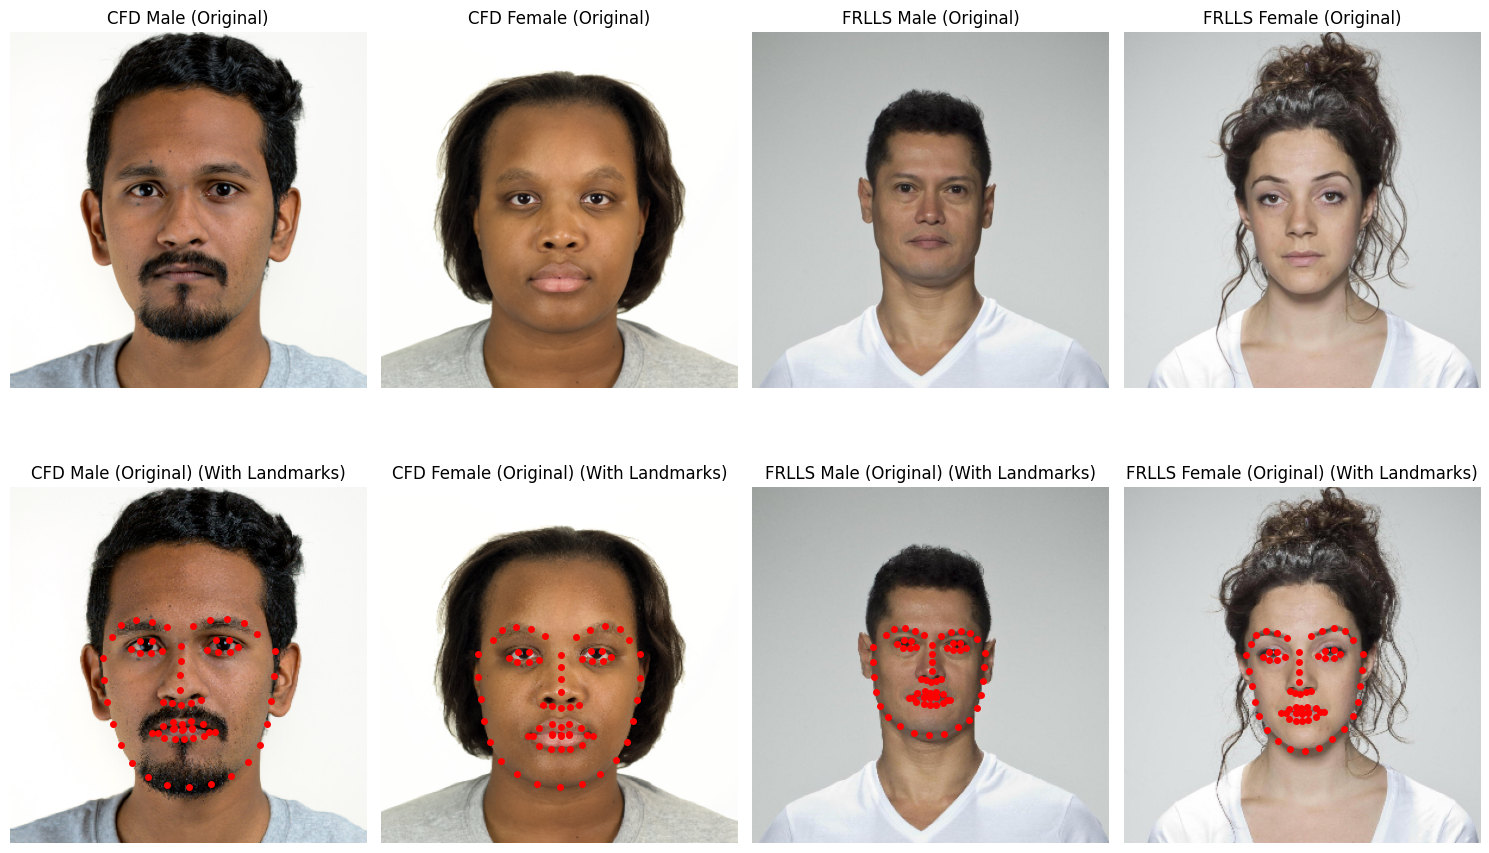

In [1]:
# This script loads and displays specified male and female images from the CFD and FRLLS datasets.
# It presents the images in a structured, two-row format:
# - Row 1: Original images without landmarks.
# - Row 2: Images with Dlib's 68 facial landmarks overlaid for visual analysis.
# 
# Key Steps:
# 1. Load Dlib's face detector and shape predictor model to facilitate landmark extraction.
# 2. Define helper functions to:
#    - Extract 68 facial landmarks from each face.
#    - Adjust images to a consistent aspect ratio for uniform display.
#    - Display each image with or without landmarks.
# 3. Load specific male and female images from each dataset (CFD and FRLLS).
# 4. Display images side-by-side in a grid, ensuring consistent aspect ratio and alignment for visual comparison.

import os
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

# Load dlib's face detector and shape predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

# Define a function to extract facial landmarks from a grayscale image
def get_landmarks(gray_image):
    faces = detector(gray_image)
    if len(faces) > 0:
        landmarks = predictor(gray_image, faces[0])  # Use the first detected face
        coords = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(68)]
        return coords
    return None

# Function to crop image to a target aspect ratio
def crop_to_aspect_ratio(image, target_aspect_ratio=1.0):
    h, w = image.shape[:2]
    current_aspect_ratio = w / h
    if current_aspect_ratio > target_aspect_ratio:
        # Wider than target aspect ratio; crop width
        new_width = int(h * target_aspect_ratio)
        start_x = (w - new_width) // 2
        return image[:, start_x:start_x + new_width]
    elif current_aspect_ratio < target_aspect_ratio:
        # Taller than target aspect ratio; crop height
        new_height = int(w / target_aspect_ratio)
        start_y = (h - new_height) // 2
        return image[start_y:start_y + new_height, :]
    return image  # Aspect ratio already matches

# Function to display an image with landmarks overlaid
def display_image_with_landmarks(image, landmarks, title, target_width=300):
    # Resize to a consistent width for display
    h, w = image.shape[:2]
    aspect_ratio = w / h
    target_height = int(target_width / aspect_ratio)
    image_resized = cv2.resize(image, (target_width, target_height))

    # Display image with landmarks
    plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(title)
    for (x, y) in landmarks:
        plt.plot(x * target_width / w, y * target_height / h, 'ro', markersize=4)

# Load images and display them side by side
cfd_folder = 'CFD_extracted_neutral'
frlls_folder = 'neutral_front'

cfd_images = [('CFD Male (Original)', 'IM-603.jpg'), ('CFD Female (Original)', 'BF-001.jpg')]
frlls_images = [('FRLLS Male (Original)', '024_03.jpg'), ('FRLLS Female (Original)', '001_03.jpg')]

# Target aspect ratio (e.g., FRLLS image aspect ratio)
target_aspect_ratio = 1350 / 1350

# Display images
plt.figure(figsize=(15, 10))

# Display original images
for i, (title, filename) in enumerate(cfd_images + frlls_images):
    folder = cfd_folder if 'CFD' in title else frlls_folder
    image_path = os.path.join(folder, filename)
    image = cv2.imread(image_path)
    image_cropped = crop_to_aspect_ratio(image, target_aspect_ratio)
    plt.subplot(2, 4, i + 1)
    plt.imshow(cv2.cvtColor(image_cropped, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(title)

# Display images with landmarks
for i, (title, filename) in enumerate(cfd_images + frlls_images):
    folder = cfd_folder if 'CFD' in title else frlls_folder
    image_path = os.path.join(folder, filename)
    image = cv2.imread(image_path)
    image_cropped = crop_to_aspect_ratio(image, target_aspect_ratio)
    gray_image = cv2.cvtColor(image_cropped, cv2.COLOR_BGR2GRAY)
    landmarks = get_landmarks(gray_image)
    plt.subplot(2, 4, i + 5)
    display_image_with_landmarks(image_cropped, landmarks, f"{title} (With Landmarks)")

plt.tight_layout()
plt.show()


Facial landmarks extracted from: CFD_extracted_neutral/AF-200.jpg
Facial Landmarks: ['0:(816, 810)', '1:(824, 907)', '2:(842, 1004)', '3:(865, 1097)', '4:(895, 1188)', '5:(947, 1265)', '6:(1033, 1319)', '7:(1125, 1359)', '8:(1226, 1375)', '9:(1326, 1359)', '10:(1418, 1319)', '11:(1502, 1265)', '12:(1557, 1191)', '13:(1588, 1099)', '14:(1608, 1001)', '15:(1625, 903)', '16:(1636, 801)', '17:(889, 697)', '18:(941, 652)', '19:(1011, 638)', '20:(1079, 657)', '21:(1138, 695)', '22:(1277, 689)', '23:(1339, 646)', '24:(1413, 625)', '25:(1489, 639)', '26:(1546, 685)', '27:(1208, 786)', '28:(1208, 851)', '29:(1207, 915)', '30:(1206, 981)', '31:(1135, 1039)', '32:(1171, 1047)', '33:(1210, 1053)', '34:(1249, 1047)', '35:(1287, 1039)', '36:(958, 796)', '37:(997, 759)', '38:(1051, 764)', '39:(1097, 820)', '40:(1047, 827)', '41:(991, 823)', '42:(1331, 815)', '43:(1372, 759)', '44:(1428, 753)', '45:(1473, 787)', '46:(1436, 816)', '47:(1379, 822)', '48:(1084, 1174)', '49:(1131, 1132)', '50:(1179, 1106)

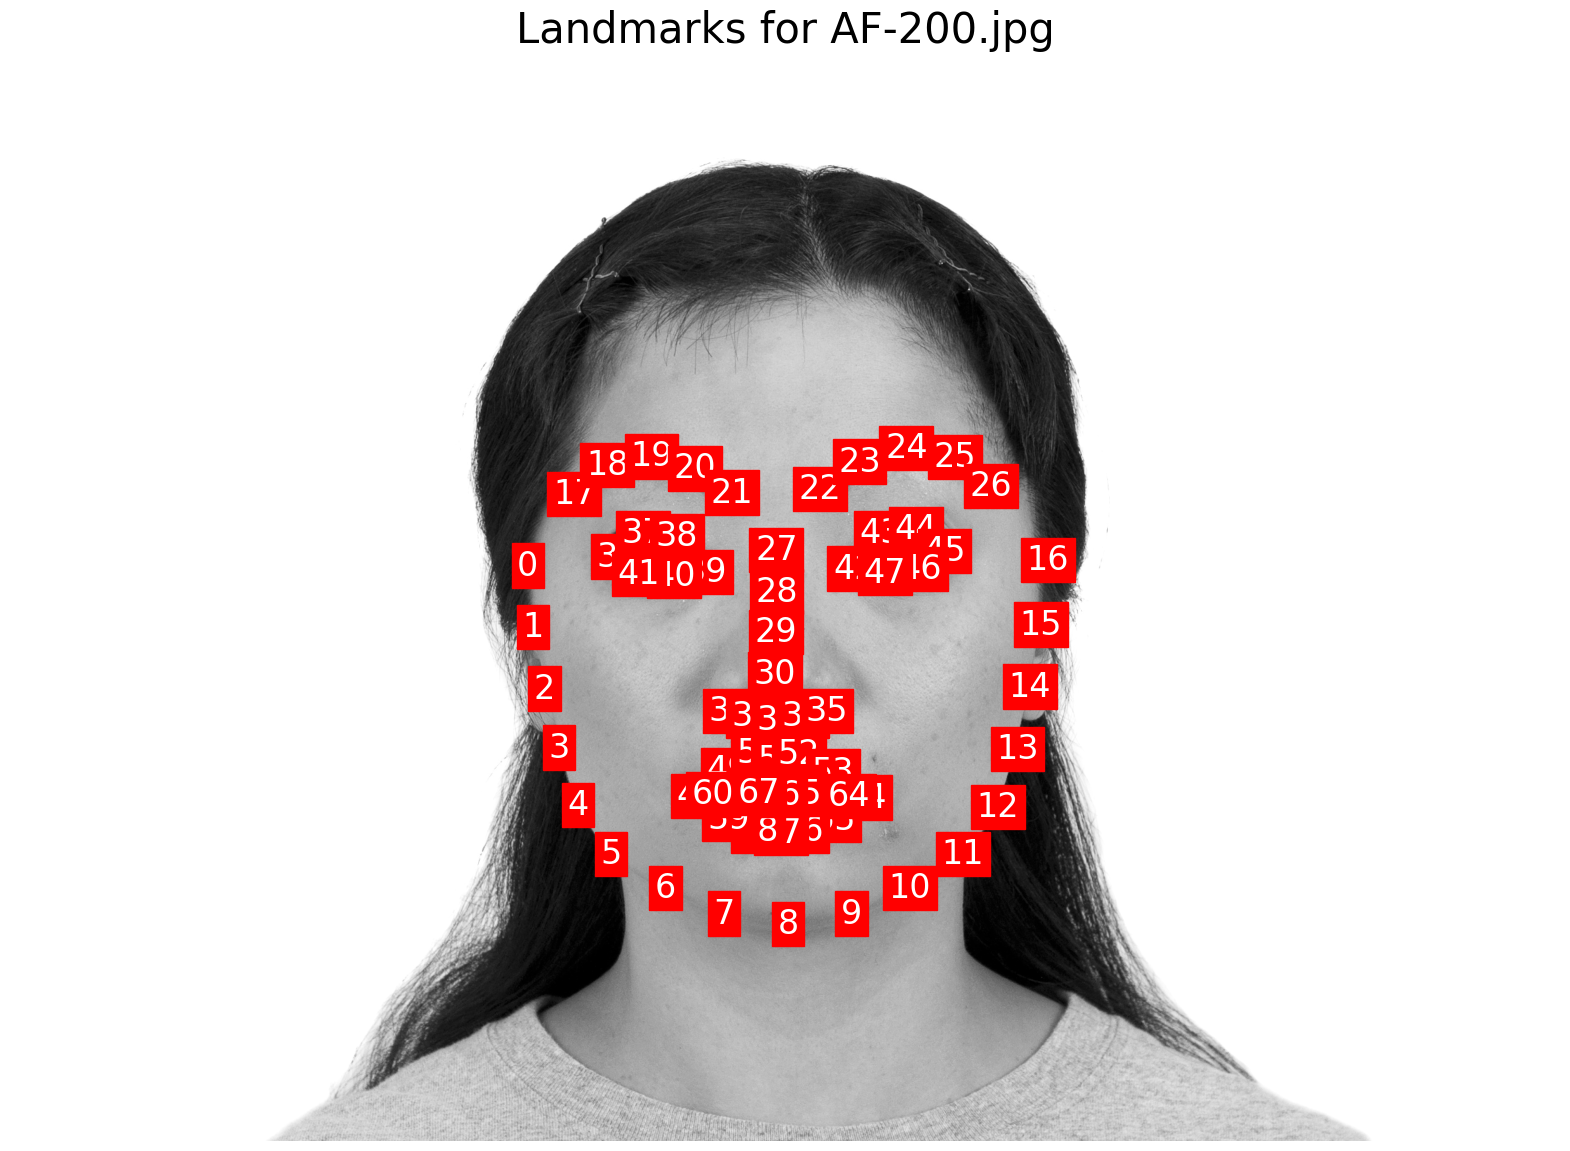

Facial landmarks extracted from: neutral_front/001_03.jpg
Facial Landmarks: ['0:(462, 636)', '1:(472, 696)', '2:(485, 753)', '3:(495, 812)', '4:(511, 868)', '5:(542, 918)', '6:(582, 960)', '7:(629, 992)', '8:(683, 998)', '9:(739, 987)', '10:(788, 954)', '11:(833, 915)', '12:(868, 868)', '13:(885, 812)', '14:(892, 752)', '15:(899, 694)', '16:(905, 633)', '17:(480, 593)', '18:(500, 558)', '19:(538, 545)', '20:(579, 553)', '21:(618, 570)', '22:(706, 565)', '23:(748, 543)', '24:(793, 532)', '25:(838, 543)', '26:(868, 577)', '27:(663, 623)', '28:(663, 662)', '29:(662, 700)', '30:(661, 739)', '31:(627, 773)', '32:(645, 778)', '33:(666, 783)', '34:(687, 776)', '35:(708, 770)', '36:(524, 642)', '37:(547, 625)', '38:(579, 625)', '39:(609, 644)', '40:(579, 653)', '41:(547, 655)', '42:(732, 639)', '43:(760, 619)', '44:(793, 616)', '45:(818, 633)', '46:(795, 647)', '47:(762, 647)', '48:(595, 856)', '49:(623, 841)', '50:(649, 832)', '51:(671, 838)', '52:(694, 831)', '53:(725, 838)', '54:(757, 851)'

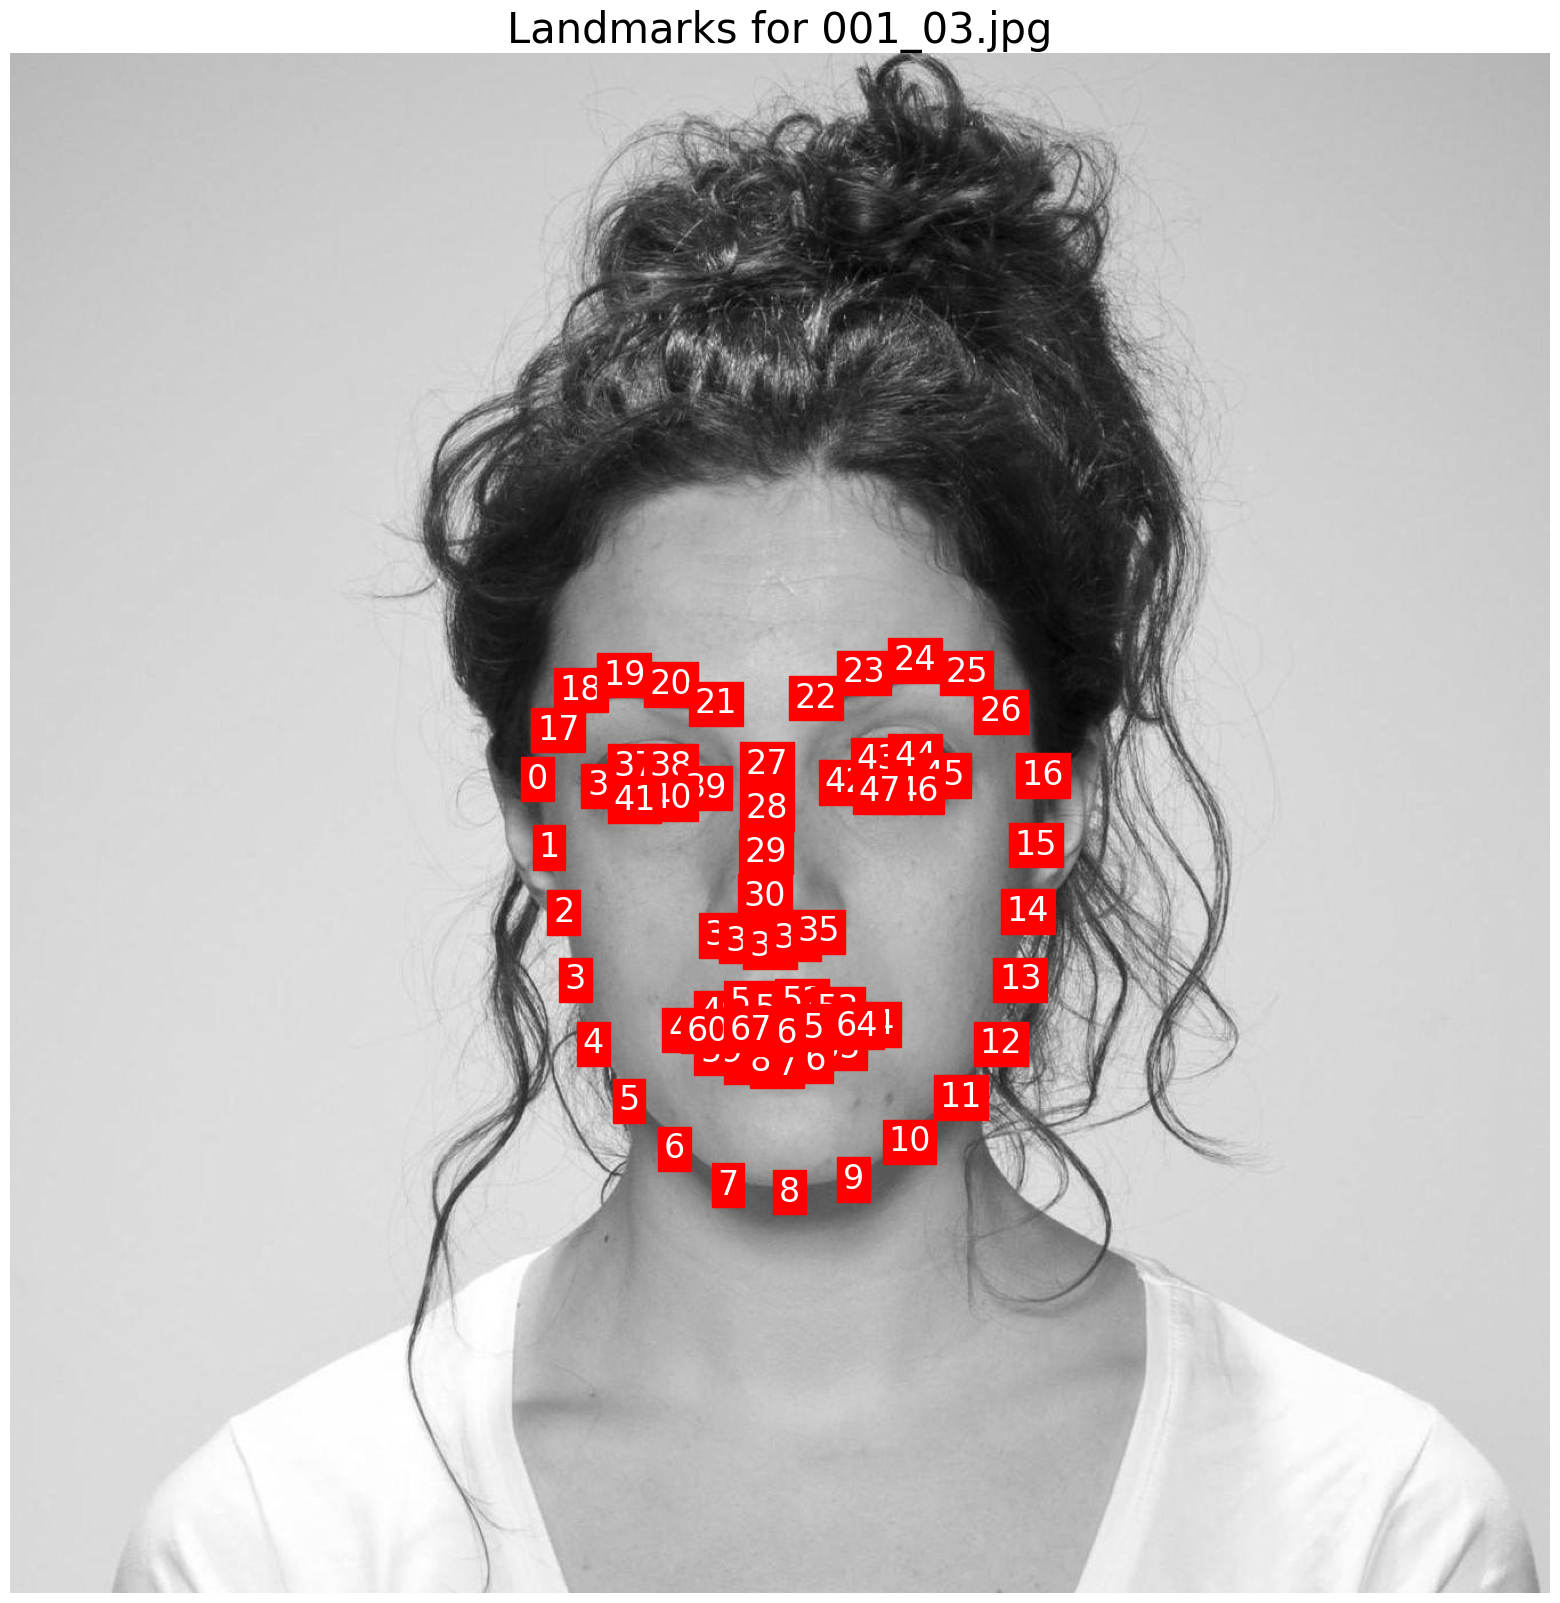

In [2]:
# Purpose: Load and display facial landmarks on the first female face from CFD and the first face from FRLLS datasets.
# Key Steps:
# 1. Load dlib's face detector and shape predictor for landmark extraction.
# 2. Define helper functions to extract landmarks and display images with overlaid, numbered landmarks.
# 3. For each dataset (CFD and FRLLS), find and process the first qualifying image to display landmarks.

# Notes for Collaborators:
# - Ensure `shape_predictor_68_face_landmarks.dat` is available in the same directory; it’s required for dlib’s shape predictor.
# - This code only processes the first female image in CFD and the first image in FRLLS. Adjust loops as needed for more images.

import os
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

# Load dlib's face detector and shape predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

# Define a function to extract facial landmarks from a grayscale image
def get_landmarks(gray_image):
    faces = detector(gray_image)
    if len(faces) > 0:
        landmarks = predictor(gray_image, faces[0])  # Use the first detected face
        coords = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(68)]
        return coords
    return None

# Function to display image with landmarks overlaid and numbered
def display_landmarks(image, landmarks, image_path, scale=1.0):
    formatted_landmarks = [f"{i}:({x}, {y})" for i, (x, y) in enumerate(landmarks)]
    print(f"Facial landmarks extracted from: {image_path}")
    print("Facial Landmarks:", formatted_landmarks)
    print("\n")
    
    plt.figure(figsize=(10 * scale, 10 * scale))
    plt.imshow(image, cmap='gray')

    # Overlay landmarks
    for i, (x, y) in enumerate(landmarks):
        plt.plot(x, y, 'ro', markersize=8 * scale)
        plt.text(x, y, str(i), color='white', fontsize=12 * scale, ha='center', va='center', backgroundcolor='red')

    plt.title(f"Landmarks for {os.path.basename(image_path)}", fontsize=15 * scale)
    plt.axis('off')
    plt.show()

# Paths to folders
cfd_folder = 'CFD_extracted_neutral'
frlls_folder = 'neutral_front'

# Display the first female image from CFD
for file in sorted(os.listdir(cfd_folder)):
    if file.endswith('.jpg') and file[1] == 'F':  # Filter for female images
        image_path = os.path.join(cfd_folder, file)
        image = cv2.imread(image_path)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Extract and display landmarks
        landmarks = get_landmarks(gray_image)
        if landmarks:
            display_landmarks(gray_image, landmarks, image_path, scale=2)
            break  # Display only the first image

# Display the first image from FRLLS
for file in sorted(os.listdir(frlls_folder)):
    if file.endswith('.jpg'):
        image_path = os.path.join(frlls_folder, file)
        image = cv2.imread(image_path)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Extract and display landmarks
        landmarks = get_landmarks(gray_image)
        if landmarks:
            display_landmarks(gray_image, landmarks, image_path, scale=2)
            break  # Display only the first image

In [3]:
# Process images in CFD and FRLLS datasets to extract facial features, storing results in DataFrames

import os
import cv2
import dlib
import numpy as np
import pandas as pd
from tqdm import tqdm

# Load dlib's face detector and shape predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

# Function to compute facial features from landmarks
def calculate_features(landmarks):
    if landmarks is None:
        return None

    # Key landmarks
    key_landmarks = {
        'left_temple': np.array(landmarks[0]),
        'right_temple': np.array(landmarks[16]),
        'chin_tip': np.array(landmarks[8]),
        'nose_tip': np.array(landmarks[30]),
        'nose_top': np.array(landmarks[27]),
        'nose_bottom': np.array(landmarks[33]),
        'nose_left': np.array(landmarks[31]),
        'nose_right': np.array(landmarks[35]),
        'left_eye_outer': np.array(landmarks[36]),
        'left_eye_inner': np.array(landmarks[39]),
        'right_eye_outer': np.array(landmarks[45]),
        'right_eye_inner': np.array(landmarks[42]),
        'mouth_left_corner': np.array(landmarks[48]),
        'mouth_right_corner': np.array(landmarks[54]),
        'upper_lip_center': np.array(landmarks[51]),
        'lower_lip_center': np.array(landmarks[57]),
        'glabella': np.array(landmarks[27]),
    }

    # Basic distances
    basic_distances = {
        'face_length': euclidean_distance(key_landmarks['nose_top'], key_landmarks['chin_tip']),
        'face_width': euclidean_distance(key_landmarks['left_temple'], key_landmarks['right_temple']),
        'eye_distance_inner': euclidean_distance(key_landmarks['left_eye_inner'], key_landmarks['right_eye_inner']),
        'eye_distance_outer': euclidean_distance(key_landmarks['left_eye_outer'], key_landmarks['right_eye_outer']),
        'mouth_width': euclidean_distance(key_landmarks['mouth_left_corner'], key_landmarks['mouth_right_corner']),
        'nose_width': euclidean_distance(key_landmarks['nose_left'], key_landmarks['nose_right']),
        'nose_length': euclidean_distance(key_landmarks['nose_top'], key_landmarks['nose_bottom']),
        'lip_height': euclidean_distance(key_landmarks['upper_lip_center'], key_landmarks['lower_lip_center']),
        'left_eye_width': euclidean_distance(key_landmarks['left_eye_outer'], key_landmarks['left_eye_inner']),
        'interocular_distance': euclidean_distance(key_landmarks['left_eye_outer'], key_landmarks['right_eye_outer']),
    }

    # Symmetry-related distances
    symmetry_distances = {
        'left_eye_to_nose_tip': euclidean_distance(key_landmarks['left_eye_inner'], key_landmarks['nose_tip']),
        'right_eye_to_nose_tip': euclidean_distance(key_landmarks['right_eye_inner'], key_landmarks['nose_tip']),
        'left_mouth_to_nose_tip': euclidean_distance(key_landmarks['mouth_left_corner'], key_landmarks['nose_tip']),
        'right_mouth_to_nose_tip': euclidean_distance(key_landmarks['mouth_right_corner'], key_landmarks['nose_tip']),
        'left_nose_to_nose_tip': euclidean_distance(key_landmarks['nose_left'], key_landmarks['nose_tip']),
        'right_nose_to_nose_tip': euclidean_distance(key_landmarks['nose_right'], key_landmarks['nose_tip']),
        'left_eye_to_glabella': euclidean_distance(key_landmarks['left_eye_outer'], key_landmarks['glabella']),
        'right_eye_to_glabella': euclidean_distance(key_landmarks['right_eye_outer'], key_landmarks['glabella']),
    }

    # Feature ratios and proportions used in analysis
    features = {
        'golden_ratio': basic_distances['face_length'] / basic_distances['face_width'] if basic_distances['face_width'] != 0 else np.nan,
        'eye_to_mouth_ratio': basic_distances['eye_distance_inner'] / basic_distances['mouth_width'] if basic_distances['mouth_width'] != 0 else np.nan,
        'eye_spacing_ratio': basic_distances['eye_distance_outer'] / basic_distances['face_width'] if basic_distances['face_width'] != 0 else np.nan,
        'nose_to_face_length_ratio': basic_distances['nose_length'] / basic_distances['face_length'] if basic_distances['face_length'] != 0 else np.nan,
        'mouth_to_nose_ratio': basic_distances['mouth_width'] / basic_distances['nose_width'] if basic_distances['nose_width'] != 0 else np.nan,
        'lip_height_to_mouth_ratio': basic_distances['lip_height'] / basic_distances['mouth_width'] if basic_distances['mouth_width'] != 0 else np.nan,
        
        # Symmetry ratios using precomputed distances
        'eye_symmetry_ratio': abs(symmetry_distances['left_eye_to_nose_tip'] / symmetry_distances['right_eye_to_nose_tip'] - 1) if symmetry_distances['right_eye_to_nose_tip'] != 0 else np.nan,
        'mouth_symmetry_ratio': abs(symmetry_distances['left_mouth_to_nose_tip'] / symmetry_distances['right_mouth_to_nose_tip'] - 1) if symmetry_distances['right_mouth_to_nose_tip'] != 0 else np.nan,
        'nose_symmetry_ratio': abs(symmetry_distances['left_nose_to_nose_tip'] / symmetry_distances['right_nose_to_nose_tip'] - 1) if symmetry_distances['right_nose_to_nose_tip'] != 0 else np.nan,
        
        'eye_positioning_ratio': basic_distances['left_eye_width'] / basic_distances['eye_distance_inner'] if basic_distances['eye_distance_inner'] != 0 else np.nan,
        'nose_dimensions_ratio': basic_distances['nose_length'] / basic_distances['nose_width'] if basic_distances['nose_width'] != 0 else np.nan,
        'mouth_to_face_width_ratio': basic_distances['mouth_width'] / basic_distances['face_width'] if basic_distances['face_width'] != 0 else np.nan,
    }
    
    return features

# Function to extract landmarks
def get_landmarks(gray_image):
    faces = detector(gray_image)
    if len(faces) > 0:
        landmarks = predictor(gray_image, faces[0])  # Use the first detected face
        coords = [(landmarks.part(n).x, landmarks.part(n).y) for n in range(68)]
        return coords
    return None

# Function to process images in a directory, calculate features, and store them in a DataFrame
def process_images(image_folder, filtered_files):
    features_list = []
    for file in tqdm(filtered_files, desc=f"Processing images in {image_folder}"):
        image_path = os.path.join(image_folder, file)
        image = cv2.imread(image_path)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Extract landmarks
        landmarks = get_landmarks(gray_image)
        if landmarks is None:
            continue  # Skip images with no landmarks
        
        # Calculate features
        features = calculate_features(landmarks)
        if features:
            features['image_path'] = image_path
            features_list.append(features)

    # Convert the list of dictionaries to a DataFrame
    features_df = pd.DataFrame(features_list)
    return features_df

# Paths to folders
cfd_folder = 'CFD_extracted_neutral'
frlls_folder = 'neutral_front'

# Process CFD images
cfd_files = sorted([file for file in os.listdir(cfd_folder) if file.endswith('.jpg')])
cfd_features_df = process_images(cfd_folder, cfd_files)

# Process FRLLS images
frlls_files = sorted([file for file in os.listdir(frlls_folder) if file.endswith('.jpg')])
frlls_features_df = process_images(frlls_folder, frlls_files)

# Display the feature dataframes for both datasets
print("CFD Features DataFrame:")
display(cfd_features_df.head())

print("\nFRLLS Features DataFrame:")
display(frlls_features_df.head())


Processing images in CFD_extracted_neutral: 100%|█| 827/827 [03:31<00:00,  3.91i
Processing images in neutral_front: 100%|█████| 102/102 [00:11<00:00,  8.83it/s]

CFD Features DataFrame:


golden_ratio  eye_to_mouth_ratio  eye_spacing_ratio  \
0      0.718585            0.886541           0.628107   
1      0.743150            0.878087           0.593290   
2      0.826459            0.587203           0.610441   
3      0.772364            0.864881           0.598545   
4      0.755989            0.777829           0.642133   

   nose_to_face_length_ratio  mouth_to_nose_ratio  lip_height_to_mouth_ratio  \
0                   0.453112             1.736892                   0.435857   
1                   0.454899             1.617814                   0.386326   
2                   0.439068             1.618384                   0.370028   
3                   0.429543             1.505916                   0.442563   
4                   0.428896             1.929712                   0.332226   

   eye_symmetry_ratio  mouth_symmetry_ratio  nose_symmetry_ratio  \
0            0.064355              0.053467             0.079755   
1            0.053256              0.005674             0.002491   
2            0.025624              0.031024             0.007715   
3            0.023564              0.007549             0.028867   
4            0.013052              0.016469             0.001869   

   eye_positioning_ratio  nose_dimensions_ratio  mouth_to_face_width_ratio  \
0               0.602669               1.756628                   0.321941   
1               0.589058               1.752958                   0.311996   
2               0.817791               1.479778                   0.396861   
3               0.668781               1.672888                   0.298650   
4               0.628728               1.713125                   0.365234   

                         image_path  
0  CFD_extracted_neutral/AF-200.jpg  
1  CFD_extracted_neutral/AF-201.jpg  
2  CFD_extracted_neutral/AF-202.jpg  
3  CFD_extracted_neutral/AF-203.jpg  
4  CFD_extracted_neutral/AF-204.jpg


FRLLS Features DataFrame:


golden_ratio  eye_to_mouth_ratio  eye_spacing_ratio  \
0      0.847685            0.759525           0.663953   
1      0.839259            0.757035           0.652516   
2      0.874990            0.666680           0.643171   
3      0.868692            0.681122           0.588949   
4      0.815803            0.867318           0.605770   

   nose_to_face_length_ratio  mouth_to_nose_ratio  lip_height_to_mouth_ratio  \
0                   0.426136             1.999581                   0.302388   
1                   0.425986             2.269189                   0.372858   
2                   0.425969             2.175036                   0.281663   
3                   0.425086             1.837356                   0.265393   
4                   0.426652             1.667990                   0.325376   

   eye_symmetry_ratio  mouth_symmetry_ratio  nose_symmetry_ratio  \
0            0.116936              0.089355             0.145987   
1            0.091259              0.038090             0.114192   
2            0.037095              0.046309             0.035316   
3            0.080022              0.047228             0.124532   
4            0.011196              0.028955             0.001550   

   eye_positioning_ratio  nose_dimensions_ratio  mouth_to_face_width_ratio  \
0               0.690678               1.974302                   0.365854   
1               0.716748               2.282764                   0.355386   
2               0.715698               2.050038                   0.395445   
3               0.799563               2.024880                   0.335071   
4               0.561168               1.754900                   0.330827   

                 image_path  
0  neutral_front/001_03.jpg  
1  neutral_front/002_03.jpg  
2  neutral_front/003_03.jpg  
3  neutral_front/004_03.jpg  
4  neutral_front/005_03.jpg

In [6]:
# Load and clean gender data from London and CFD datasets
# Ensure proper formatting of identifiers (e.g., zero-padding face_id and stripping whitespace from Model)

# Load gender data from the provided files
london_info_df = pd.read_csv('london_faces_info.csv')
london_info_df['face_id'] = london_info_df['face_id'].astype(str).str.zfill(3)  # Pad face_id with leading zeros

cfd_info_df = pd.read_excel('IAN_CFD_dataset.xlsx', sheet_name='ALL_DATA')
cfd_info_df['Model'] = cfd_info_df['Model'].str.strip()  # Ensure Model column is clean of whitespace

# Copy the original feature DataFrames to avoid column duplication on re-run
frlls_features_with_gender_df = frlls_features_df.copy()
cfd_features_with_gender_df = cfd_features_df.copy()

# Merge gender information with FRLLS features DataFrame
frlls_features_with_gender_df['face_id'] = frlls_features_with_gender_df['image_path'].apply(lambda x: x.split('/')[-1].split('_')[0])
frlls_features_with_gender_df = frlls_features_with_gender_df.merge(
    london_info_df[['face_id', 'face_gender']], on='face_id', how='left'
).rename(columns={'face_gender': 'Gender'})

# Add binary gender column: 0 for female, 1 for male in frlls_features_with_gender_df
frlls_features_with_gender_df['GenderBinary'] = frlls_features_with_gender_df['Gender'].apply(
    lambda x: 0 if isinstance(x, str) and x.lower() == 'female' else 1 if isinstance(x, str) and x.lower() == 'male' else None
)

# Merge gender information with CFD features DataFrame
cfd_features_with_gender_df['Model'] = cfd_features_with_gender_df['image_path'].apply(lambda x: x.split('/')[-1].split('.')[0])
cfd_features_with_gender_df = cfd_features_with_gender_df.merge(
    cfd_info_df[['Model', 'GenderSelf']], on='Model', how='left'
).rename(columns={'GenderSelf': 'Gender'})

# Add binary gender column: 0 for female, 1 for male in cfd_features_with_gender_df
cfd_features_with_gender_df['GenderBinary'] = cfd_features_with_gender_df['Gender'].apply(
    lambda x: 0 if x == 'F' else 1 if x == 'M' else None
)

# Display the final DataFrames with merged gender information
print("FRLLS Features DataFrame with Gender and GenderBinary:")
display(frlls_features_with_gender_df.tail())

print("\nCFD Features DataFrame with Gender and GenderBinary:")
display(cfd_features_with_gender_df.tail())


FRLLS Features DataFrame with Gender and GenderBinary:


golden_ratio  eye_to_mouth_ratio  eye_spacing_ratio  \
97       0.859240            0.642981           0.597558   
98       0.900444            0.728139           0.598424   
99       0.811408            0.698655           0.626966   
100      0.756753            0.723670           0.585064   
101      0.862162            0.685225           0.618413   

     nose_to_face_length_ratio  mouth_to_nose_ratio  \
97                    0.415676             2.141467   
98                    0.412066             1.812638   
99                    0.453876             1.999239   
100                   0.390597             2.144519   
101                   0.395323             2.238546   

     lip_height_to_mouth_ratio  eye_symmetry_ratio  mouth_symmetry_ratio  \
97                    0.351644            0.022677              0.016309   
98                    0.305032            0.160430              0.061890   
99                    0.320949            0.005325              0.007113   
100                   0.159519            0.011841              0.022846   
101                   0.320843            0.044875              0.003756   

     nose_symmetry_ratio  eye_positioning_ratio  nose_dimensions_ratio  \
97              0.016905               0.684016               1.942068   
98              0.181871               0.678187               1.929201   
99              0.013762               0.750981               2.041018   
100             0.068393               0.694897               1.854006   
101             0.022797               0.761491               2.125051   

     mouth_to_face_width_ratio                image_path face_id  Gender  \
97                    0.393837  neutral_front/142_03.jpg     142    male   
98                    0.348624  neutral_front/143_03.jpg     143    male   
99                    0.360740  neutral_front/144_03.jpg     144  female   
100                   0.341902  neutral_front/172_03.jpg     172    male   
101                   0.359035  neutral_front/173_03.jpg     173    male   

     GenderBinary  
97              1  
98              1  
99              0  
100             1  
101             1


CFD Features DataFrame with Gender and GenderBinary:


golden_ratio  eye_to_mouth_ratio  eye_spacing_ratio  \
822      0.807038            0.713976           0.627260   
823      0.866989            0.643313           0.595139   
824      0.812205            0.830136           0.609109   
825      0.818860            0.621637           0.593288   
826      0.794181            0.662965           0.553844   

     nose_to_face_length_ratio  mouth_to_nose_ratio  \
822                   0.393264             2.001012   
823                   0.423613             1.906167   
824                   0.390131             1.806604   
825                   0.410983             2.118882   
826                   0.433958             1.907179   

     lip_height_to_mouth_ratio  eye_symmetry_ratio  mouth_symmetry_ratio  \
822                   0.234003            0.020029              0.003710   
823                   0.170317            0.038176              0.017268   
824                   0.311940            0.060368              0.042901   
825                   0.259348            0.045650              0.030948   
826                   0.253808            0.065304              0.072620   

     nose_symmetry_ratio  eye_positioning_ratio  nose_dimensions_ratio  \
822             0.006513               0.659171               1.675604   
823             0.007080               0.758523               1.882858   
824             0.072760               0.671092               1.813532   
825             0.052720               0.744795               1.847251   
826             0.132778               0.696576               1.877810   

     mouth_to_face_width_ratio                        image_path   Model  \
822                   0.379015  CFD_extracted_neutral/WM-254.jpg  WM-254   
823                   0.371815  CFD_extracted_neutral/WM-255.jpg  WM-255   
824                   0.315656  CFD_extracted_neutral/WM-256.jpg  WM-256   
825                   0.386024  CFD_extracted_neutral/WM-257.jpg  WM-257   
826                   0.350031  CFD_extracted_neutral/WM-258.jpg  WM-258   

    Gender  GenderBinary  
822      M             1  
823      M             1  
824      M             1  
825      M             1  
826      M             1

In [5]:
# Calculate and display the number of female and male subjects in both CFD and FRLLS datasets
# GenderBinary: 0 = female, 1 = male
# Summarizes gender distribution for reference and validation of data completeness

# Print the number of female and male subjects in CFD dataset
cfd_female_count = (cfd_features_with_gender_df['GenderBinary'] == 0).sum()
cfd_male_count = (cfd_features_with_gender_df['GenderBinary'] == 1).sum()

print("CFD Dataset:")
print(f"Number of female subjects: {cfd_female_count}")
print(f"Number of male subjects: {cfd_male_count}")

# Print the number of female and male subjects in FRLLS dataset
frlls_female_count = (frlls_features_with_gender_df['GenderBinary'] == 0).sum()
frlls_male_count = (frlls_features_with_gender_df['GenderBinary'] == 1).sum()

print("\nFRLLS Dataset:")
print(f"Number of female subjects: {frlls_female_count}")
print(f"Number of male subjects: {frlls_male_count}")

CFD Dataset:
Number of female subjects: 421
Number of male subjects: 406

FRLLS Dataset:
Number of female subjects: 49
Number of male subjects: 53


Descriptive Statistics for CFD Dataset (Standardized):


golden_ratio  eye_to_mouth_ratio  eye_spacing_ratio  \
count      827.0000            827.0000           827.0000   
mean        -0.0000              0.0000            -0.0000   
std          1.0006              1.0006             1.0006   
min         -2.7916             -2.7592            -2.8253   
25%         -0.7230             -0.7062            -0.6926   
50%         -0.0302             -0.0459            -0.0539   
75%          0.6459              0.6283             0.6531   
max          3.7474              3.5739             3.1907   

       nose_to_face_length_ratio  mouth_to_nose_ratio  \
count                   827.0000             827.0000   
mean                     -0.0000               0.0000   
std                       1.0006               1.0006   
min                      -3.0579              -2.5450   
25%                      -0.6730              -0.6779   
50%                      -0.0158              -0.0324   
75%                       0.6630               0.6472   
max                       3.1738               3.9473   

       lip_height_to_mouth_ratio  eye_symmetry_ratio  mouth_symmetry_ratio  \
count                   827.0000            827.0000              827.0000   
mean                     -0.0000              0.0000               -0.0000   
std                       1.0006              1.0006                1.0006   
min                      -2.8576             -1.2166               -1.2103   
25%                      -0.6475             -0.7463               -0.7618   
50%                       0.0241             -0.2333               -0.2050   
75%                       0.6789              0.5086                0.5408   
max                       2.8286              5.8915                5.3594   

       nose_symmetry_ratio  eye_positioning_ratio  nose_dimensions_ratio  \
count             827.0000               827.0000               827.0000   
mean               -0.0000                -0.0000                -0.0000   
std                 1.0006                 1.0006                 1.0006   
min                -1.1954                -2.7704                -3.1444   
25%                -0.7553                -0.6992                -0.7136   
50%                -0.2297                -0.0147                 0.0200   
75%                 0.4957                 0.6562                 0.6888   
max                 4.3046                 2.9527                 2.9405   

       mouth_to_face_width_ratio  
count                   827.0000  
mean                     -0.0000  
std                       1.0006  
min                      -2.7825  
25%                      -0.6967  
50%                      -0.0856  
75%                       0.6572  
max                       2.8679


Descriptive Statistics for FRLLS Dataset (Standardized):


golden_ratio  eye_to_mouth_ratio  eye_spacing_ratio  \
count      102.0000            102.0000           102.0000   
mean         0.4831              0.5458            -0.1930   
std          0.9738              0.9730             0.9969   
min         -1.9432             -1.0350            -2.8689   
25%         -0.1907             -0.2249            -0.8756   
50%          0.6084              0.4226            -0.0547   
75%          1.1203              1.2241             0.4882   
max          3.1477              3.1521             2.0927   

       nose_to_face_length_ratio  mouth_to_nose_ratio  \
count                   102.0000             102.0000   
mean                     -0.6766               1.0557   
std                       1.2654               1.4579   
min                      -3.2962              -2.5076   
25%                      -1.5059               0.0503   
50%                      -0.7806               1.1293   
75%                       0.0814               2.0602   
max                       3.1011               4.7844   

       lip_height_to_mouth_ratio  eye_symmetry_ratio  mouth_symmetry_ratio  \
count                   102.0000            102.0000              102.0000   
mean                     -0.0929              0.6188                0.0962   
std                       1.1049              1.3654                1.1957   
min                      -4.0009             -1.1612               -1.2024   
25%                      -0.7306             -0.5366               -0.7589   
50%                      -0.2039              0.3802               -0.3018   
75%                       0.5863              1.4465                0.4923   
max                       2.6736              5.8838                4.5614   

       nose_symmetry_ratio  eye_positioning_ratio  nose_dimensions_ratio  \
count             102.0000               102.0000               102.0000   
mean                0.2899                -0.0394                 1.1127   
std                 1.2114                 0.9623                 1.2119   
min                -1.1748                -2.2787                -1.8003   
25%                -0.6908                -0.6536                 0.3954   
50%                 0.0325                -0.0184                 1.1684   
75%                 1.0077                 0.6158                 1.9097   
max                 3.6938                 2.6958                 3.2723   

       mouth_to_face_width_ratio  
count                   102.0000  
mean                     -0.6322  
std                       0.8509  
min                      -2.7897  
25%                      -1.2531  
50%                      -0.7665  
75%                      -0.0943  
max                       1.3690

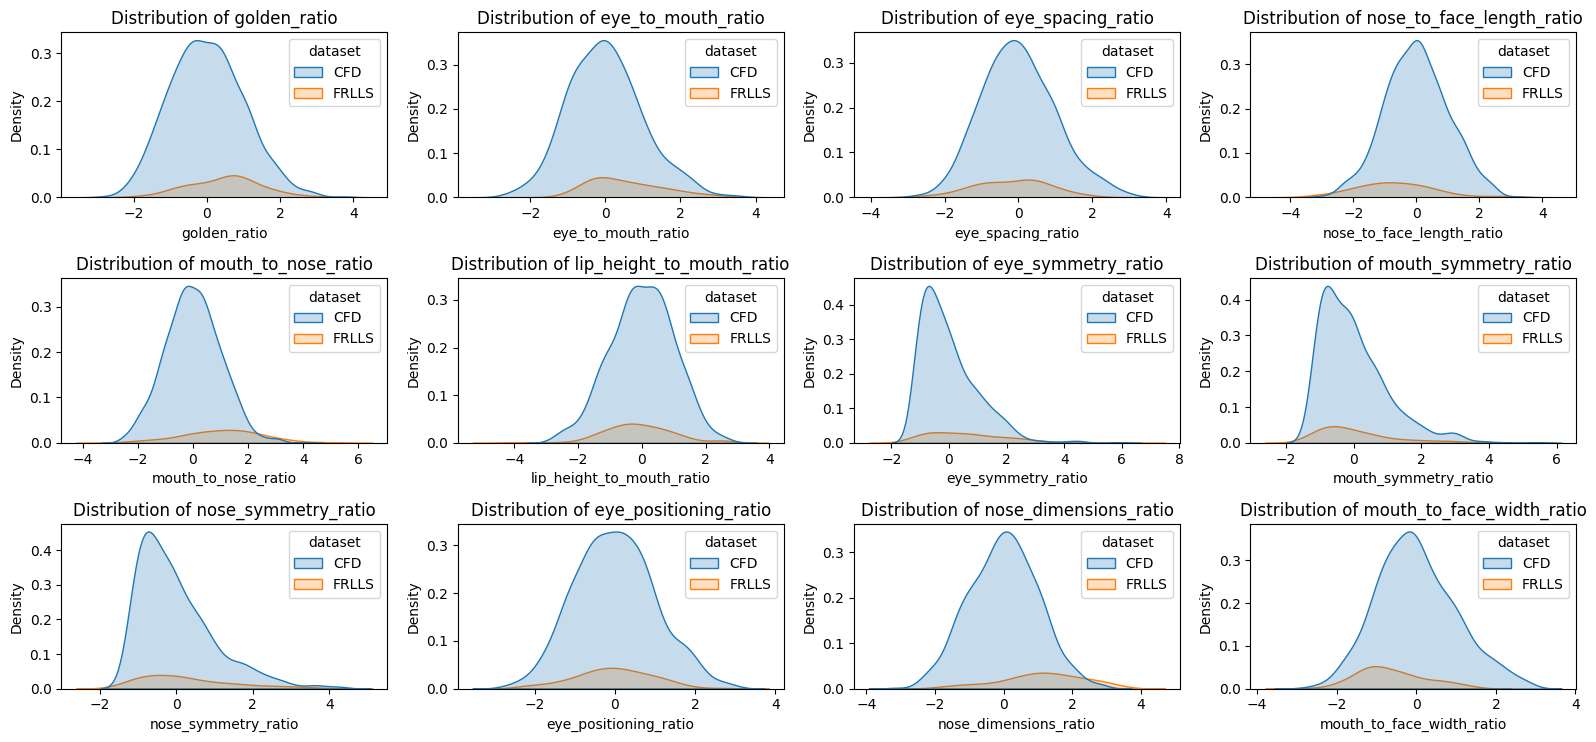

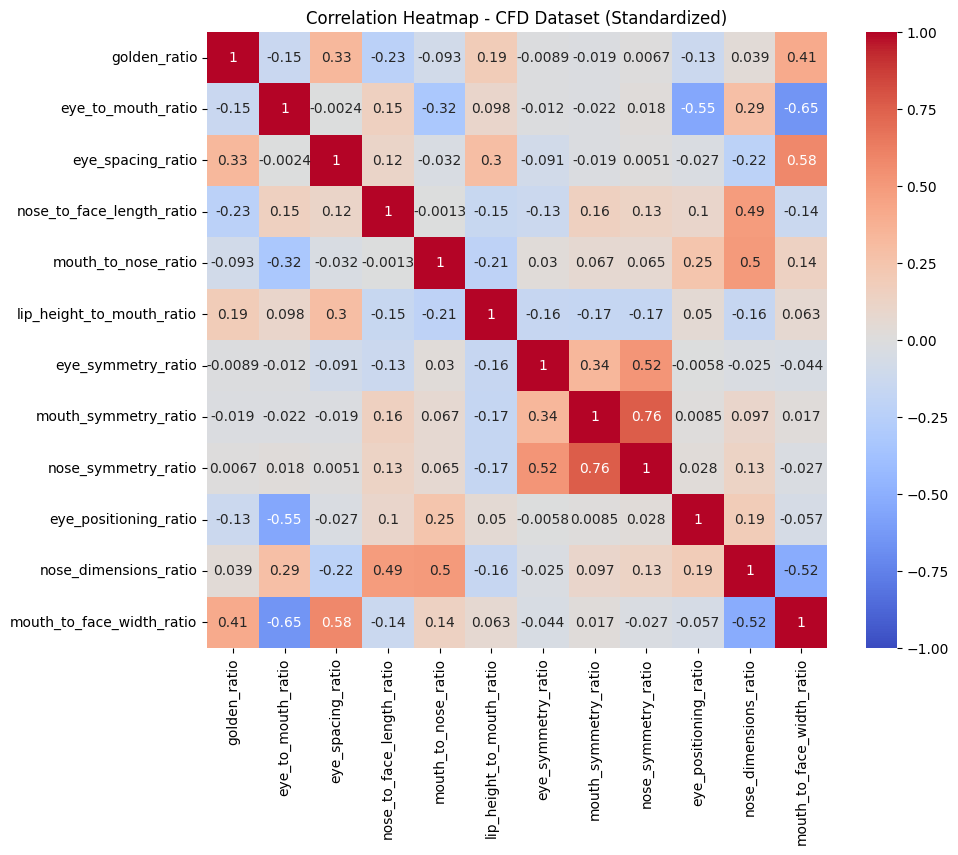

Variance Inflation Factor (VIF):
                       Feature         VIF
0                golden_ratio   38.504324
1          eye_to_mouth_ratio   69.935731
2           eye_spacing_ratio   22.979194
3   nose_to_face_length_ratio   35.650378
4         mouth_to_nose_ratio   59.898277
5   lip_height_to_mouth_ratio    1.355752
6          eye_symmetry_ratio    1.488353
7        mouth_symmetry_ratio    2.475551
8         nose_symmetry_ratio    2.986126
9       eye_positioning_ratio   25.628132
10      nose_dimensions_ratio  134.676256
11  mouth_to_face_width_ratio  100.533647
No pairs with correlation above 0.8 detected.


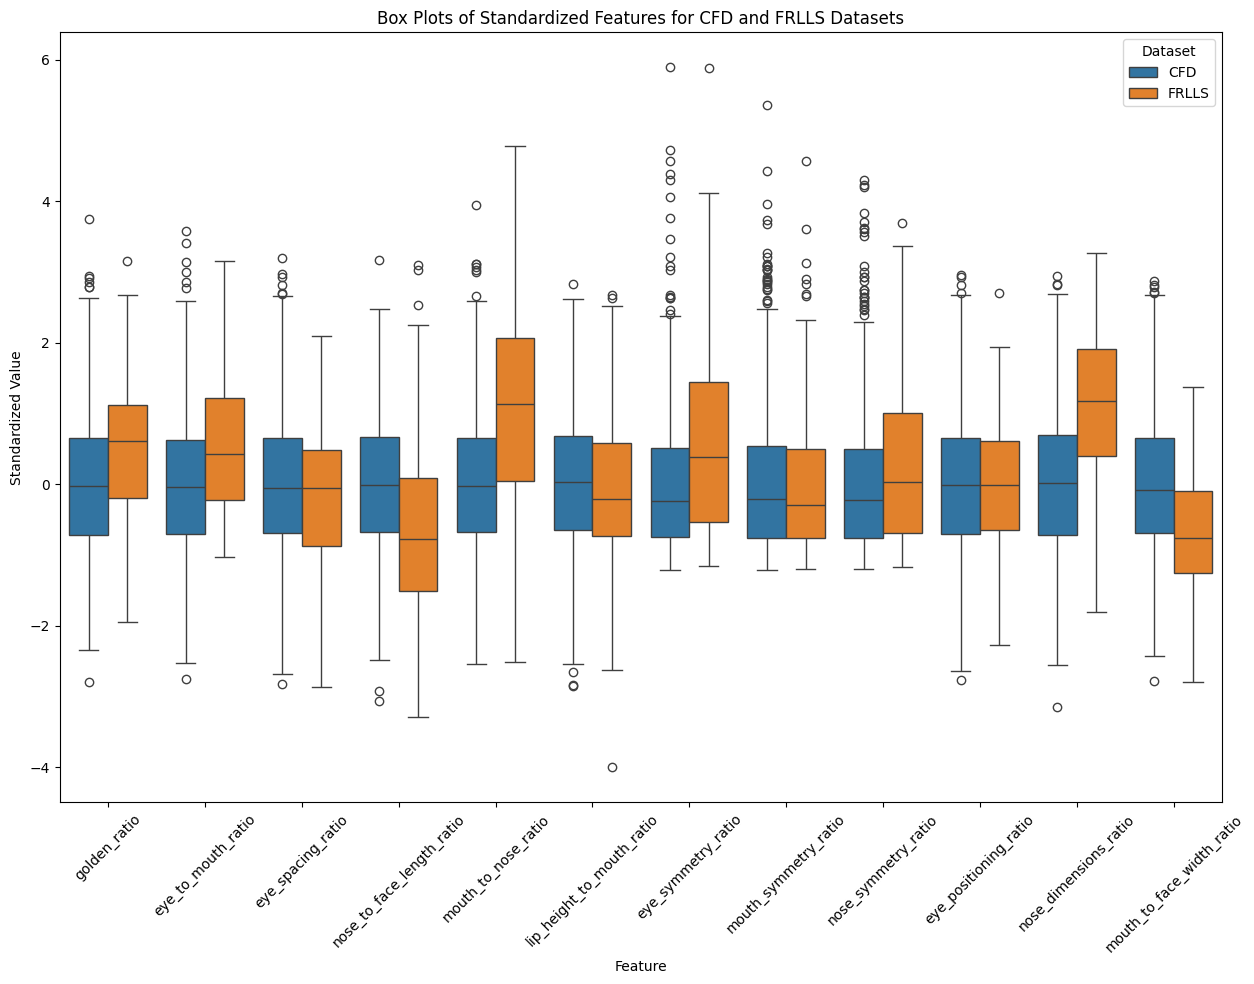

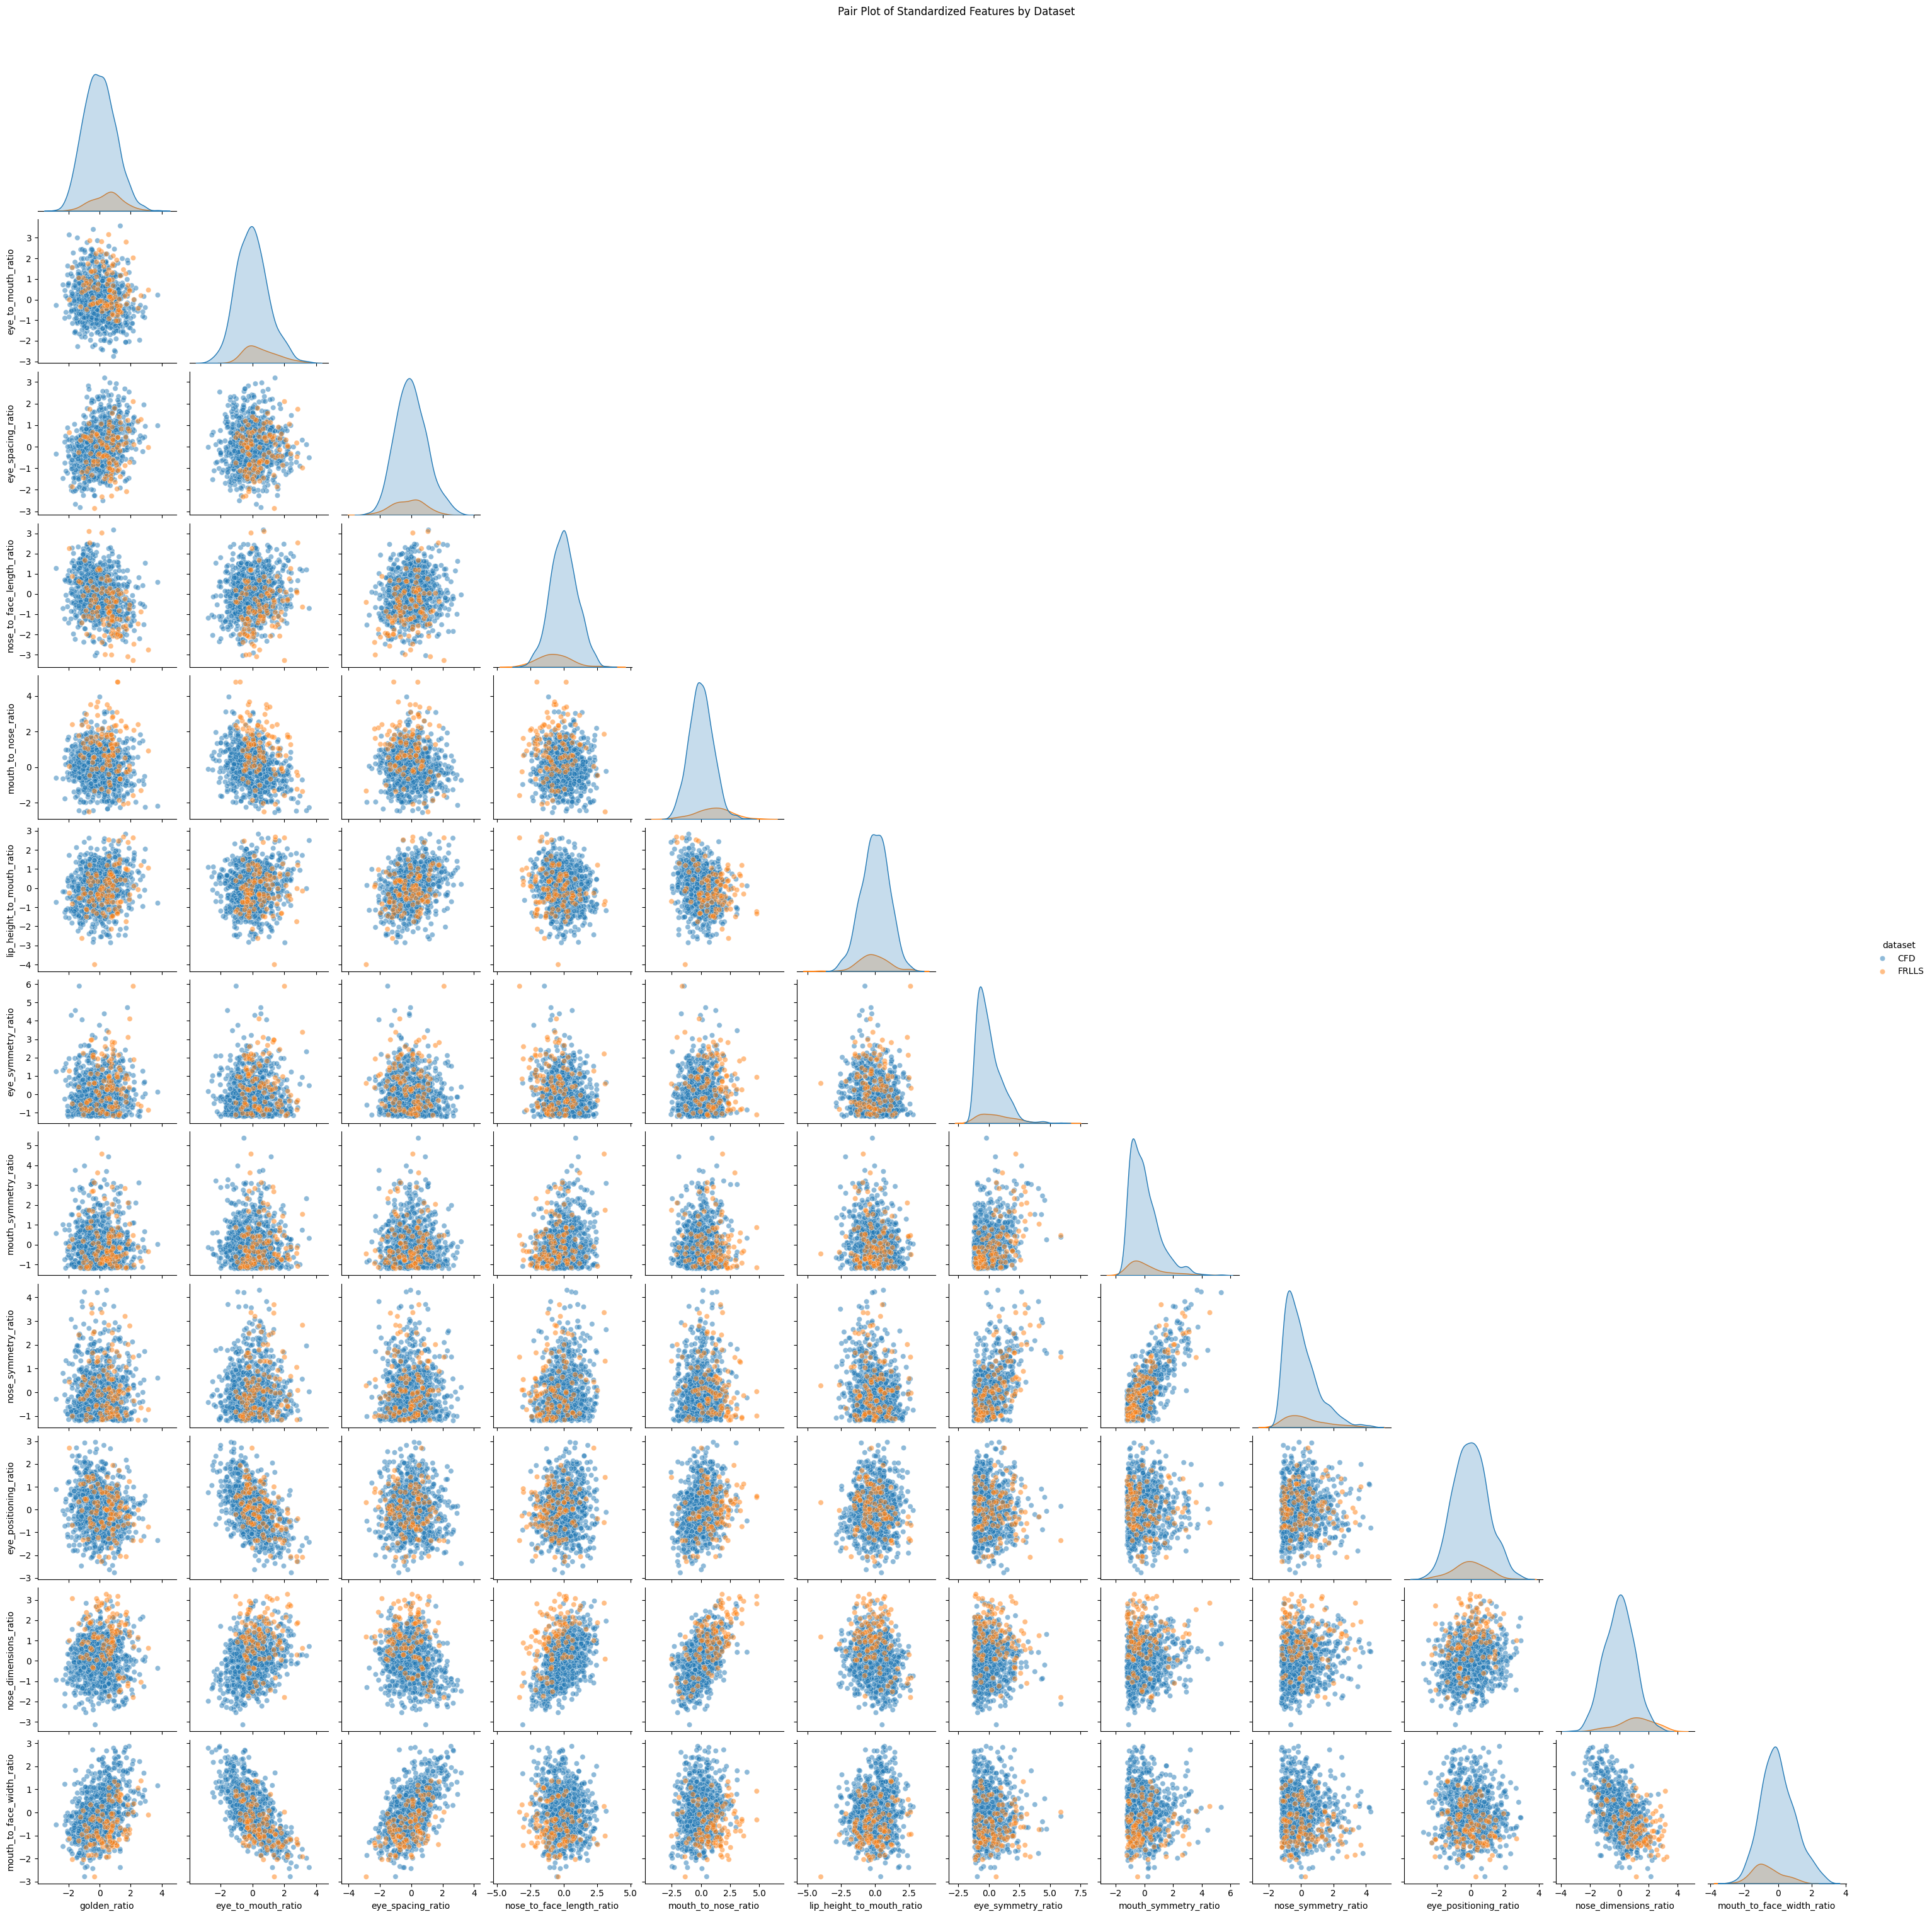

In [7]:
# EXPLORATORY DATA ANALYSIS OF RAW FEATURE MEASUREMENTS

# Step 1: Load and Standardize the Raw Feature Set
# Load the CFD and FRLLS datasets and drop non-feature columns (e.g., identifiers).
# Standardize features for each dataset to enable consistent comparisons.

# Step 2: Descriptive Statistics for Each Dataset
# Display descriptive statistics (mean, std, min, max, quartiles) for each standardized feature
# in the CFD and FRLLS datasets, providing an overview of feature distributions.

# Step 3: Feature Distributions by Dataset
# Plot kernel density estimates (KDE) for each feature, comparing distributions across CFD and FRLLS datasets.

# Step 4: Pairwise Correlation Heatmap for CFD Dataset
# Display a correlation heatmap for the CFD dataset, highlighting relationships between features.

# Step 5: Multi-Collinearity Check with Variance Inflation Factor (VIF)
# Calculate and display the VIF for each feature in the CFD dataset, identifying potential collinearity issues.

# Step 6: Feature Pair Scatter Plots for Highly Correlated Pairs
# Identify highly correlated feature pairs (correlation > 0.8) in the CFD dataset and
# generate scatter plots to visualize the relationships between these pairs.

# Step 7: Box Plots for Each Feature by Dataset
# Generate box plots for each feature in the CFD and FRLLS datasets to visualize their range, median, and outliers.

# Step 8: Pair Plot for Each Feature (Color by Dataset)
# Create a pair plot (scatter plot matrix) for all features, colored by dataset, to observe relationships and distributions.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Load and Standardize the Raw Feature Set
# Assuming cfd_features_with_gender_df and frlls_features_with_gender_df are the raw DataFrames with untransformed features

# Drop non-feature columns (e.g., identifiers)
cfd_features = cfd_features_with_gender_df.drop(columns=['Gender', 'GenderBinary', 'image_path', 'Model'])
frlls_features = frlls_features_with_gender_df.drop(columns=['Gender', 'GenderBinary', 'image_path', 'face_id'])

# Standardize the CFD and FRLLS datasets for comparison purposes
scaler = StandardScaler()
cfd_standardized_df = pd.DataFrame(scaler.fit_transform(cfd_features), columns=cfd_features.columns)
frlls_standardized_df = pd.DataFrame(scaler.transform(frlls_features), columns=frlls_features.columns)

# Add a column to indicate the dataset origin
cfd_standardized_df['dataset'] = 'CFD'
frlls_standardized_df['dataset'] = 'FRLLS'

# Combine standardized datasets for analysis
combined_df = pd.concat([cfd_standardized_df, frlls_standardized_df], ignore_index=True)

# Step 2: Descriptive Statistics for Each Dataset
pd.options.display.float_format = '{:.4f}'.format  # Suppress scientific notation for readability

print("Descriptive Statistics for CFD Dataset (Standardized):")
display(cfd_standardized_df.describe())

print("\nDescriptive Statistics for FRLLS Dataset (Standardized):")
display(frlls_standardized_df.describe())

pd.reset_option('display.float_format')  # Reset display options

# Step 3: Feature Distributions by Dataset
plt.figure(figsize=(16, 12))
for i, feature in enumerate(combined_df.columns[:-1], 1):  # Exclude 'dataset' column
    plt.subplot(5, 4, i)
    sns.kdeplot(data=combined_df, x=feature, hue='dataset', fill=True)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

# Step 4: Pairwise Correlation Heatmap for CFD Dataset
plt.figure(figsize=(10, 8))
sns.heatmap(cfd_standardized_df.drop(columns=['dataset']).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap - CFD Dataset (Standardized)")
plt.show()

# Step 5: Multi-Collinearity Check with Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["Feature"] = cfd_standardized_df.columns[:-1]  # Exclude 'dataset' column
vif_data["VIF"] = [variance_inflation_factor(cfd_standardized_df.iloc[:, :-1].values, i) 
                   for i in range(cfd_standardized_df.shape[1] - 1)]
print("Variance Inflation Factor (VIF):\n", vif_data)

# Step 6: Feature Pair Scatter Plots for Highly Correlated Pairs
# Identify highly correlated pairs (correlation > 0.8) in the CFD dataset
high_corr_pairs = [(f1, f2) for f1 in cfd_standardized_df.columns[:-1] for f2 in cfd_standardized_df.columns[:-1] 
                   if f1 != f2 and abs(cfd_standardized_df.drop(columns=['dataset']).corr().loc[f1, f2]) > 0.8]
if high_corr_pairs:
    print("\nHighly correlated feature pairs:\n", high_corr_pairs)
    plt.figure(figsize=(16, 12))
    for i, (f1, f2) in enumerate(high_corr_pairs[:10], 1):  # Display up to 10 pairs
        plt.subplot(5, 2, i)
        sns.scatterplot(data=combined_df, x=f1, y=f2, hue='dataset')
        plt.title(f"{f1} vs {f2}")
    plt.tight_layout()
    plt.show()
else:
    print("No pairs with correlation above 0.8 detected.")

# Step 7: Box Plots for Each Feature by Dataset
plt.figure(figsize=(15, 10))
sns.boxplot(data=combined_df.melt(id_vars='dataset'), x='variable', y='value', hue='dataset')
plt.xticks(rotation=45)
plt.title("Box Plots of Standardized Features for CFD and FRLLS Datasets")
plt.ylabel("Standardized Value")
plt.xlabel("Feature")
plt.legend(title='Dataset')
plt.show()

# Step 8: Pair Plot for Each Feature (Color by Dataset)
sns.pairplot(combined_df, hue='dataset', plot_kws={'alpha': 0.5}, corner=True)
plt.suptitle("Pair Plot of Standardized Features by Dataset", y=1.02)
plt.show()


In [8]:
# This cell applies data transformations separately for training, validation, and test sets to prevent data leakage.

from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.model_selection import train_test_split

# Step 1: Identify feature columns dynamically (exclude identifiers and target)
features = cfd_features_with_gender_df.columns.difference(['Gender', 'GenderBinary', 'image_path', 'Model']).tolist()

# Step 2: Split CFD dataset into training and validation sets
X_cfd = cfd_features_with_gender_df[features]
y_cfd = cfd_features_with_gender_df['GenderBinary']
X_train, X_val, y_train, y_val = train_test_split(X_cfd, y_cfd, test_size=0.2, random_state=42, stratify=y_cfd)

# Step 3: Apply transformations separately for each dataset
# CFD Training Set
pt_train = PowerTransformer()
X_train_transformed = pd.DataFrame(pt_train.fit_transform(X_train), columns=features)
scaler_train = MinMaxScaler()
X_train_normalized = pd.DataFrame(scaler_train.fit_transform(X_train_transformed), columns=features)

# CFD Validation Set
X_val_transformed = pd.DataFrame(pt_train.transform(X_val), columns=features)  # Use the same PowerTransformer from training
X_val_normalized = pd.DataFrame(scaler_train.transform(X_val_transformed), columns=features)  # Use the same scaler

# FRLLS Test Set
X_frlls = frlls_features_with_gender_df[features]
pt_frlls = PowerTransformer()
scaler_frlls = MinMaxScaler()
X_frlls_transformed = pd.DataFrame(pt_train.transform(X_frlls), columns=features)  # Use training transformer
X_frlls_normalized = pd.DataFrame(scaler_train.transform(X_frlls_transformed), columns=features)

# Step 4: Reintegrate identifiers and target label
X_train_normalized['GenderBinary'] = y_train.values
X_train_normalized['Gender'] = cfd_features_with_gender_df.loc[y_train.index, 'Gender']
X_train_normalized['image_path'] = cfd_features_with_gender_df.loc[y_train.index, 'image_path']
X_train_normalized['Model'] = cfd_features_with_gender_df.loc[y_train.index, 'Model']

X_val_normalized['GenderBinary'] = y_val.values
X_val_normalized['Gender'] = cfd_features_with_gender_df.loc[y_val.index, 'Gender']
X_val_normalized['image_path'] = cfd_features_with_gender_df.loc[y_val.index, 'image_path']
X_val_normalized['Model'] = cfd_features_with_gender_df.loc[y_val.index, 'Model']

X_frlls_normalized['GenderBinary'] = frlls_features_with_gender_df['GenderBinary']
X_frlls_normalized['Gender'] = frlls_features_with_gender_df['Gender']
X_frlls_normalized['image_path'] = frlls_features_with_gender_df['image_path']
X_frlls_normalized['face_id'] = frlls_features_with_gender_df['face_id']

# Rename the DataFrames for subsequent use
transformed_train_df = X_train_normalized
transformed_val_df = X_val_normalized
transformed_frlls_df = X_frlls_normalized

# Display the first few rows to verify
print("Transformed Training DataFrame:")
display(transformed_train_df.head())

print("\nTransformed Validation DataFrame:")
display(transformed_val_df.head())

print("\nTransformed FRLLS DataFrame:")
display(transformed_frlls_df.head())


Transformed Training DataFrame:


eye_positioning_ratio  eye_spacing_ratio  eye_symmetry_ratio  \
0               0.320176           0.484202            0.440769   
1               0.767959           0.526718            0.026300   
2               0.568962           0.327508            0.600633   
3               0.496026           0.620242            0.134297   
4               0.441602           0.571635            0.552925   

   eye_to_mouth_ratio  golden_ratio  lip_height_to_mouth_ratio  \
0            0.696061      0.532653                   0.103588   
1            0.461423      0.504764                   0.206137   
2            0.434453      0.466652                   0.332606   
3            0.516404      0.602376                   0.488214   
4            0.841467      0.367447                   0.301596   

   mouth_symmetry_ratio  mouth_to_face_width_ratio  mouth_to_nose_ratio  \
0              0.464868                   0.511764             0.518213   
1              0.468995                   0.489658             0.691430   
2              0.090400                   0.537081             0.409033   
3              0.123843                   0.641987             0.578314   
4              0.778623                   0.329758             0.406933   

   nose_dimensions_ratio  nose_symmetry_ratio  nose_to_face_length_ratio  \
0               0.739378             0.539717                   0.734537   
1               0.870685             0.101792                   0.745916   
2               0.449997             0.544526                   0.442294   
3               0.644578             0.172734                   0.607609   
4               0.796947             0.815750                   0.894871   

   GenderBinary Gender                        image_path   Model  
0             1      F  CFD_extracted_neutral/AF-200.jpg  AF-200  
1             0    NaN                               NaN     NaN  
2             1      F  CFD_extracted_neutral/AF-202.jpg  AF-202  
3             1      F  CFD_extracted_neutral/AF-203.jpg  AF-203  
4             0      F  CFD_extracted_neutral/AF-204.jpg  AF-204


Transformed Validation DataFrame:


eye_positioning_ratio  eye_spacing_ratio  eye_symmetry_ratio  \
0               0.612202           0.479427            0.069231   
1               0.623273           0.423836            0.784174   
2               0.659922           0.601420            0.420281   
3               0.651247           0.327661            0.667386   
4               0.379088           0.672333            0.553303   

   eye_to_mouth_ratio  golden_ratio  lip_height_to_mouth_ratio  \
0            0.607353      0.466153                   0.452614   
1            0.667309      0.567847                   0.462529   
2            0.353315      0.655436                   0.136991   
3            0.593073      0.320096                   0.111053   
4            0.709618      0.509191                   0.414555   

   mouth_symmetry_ratio  mouth_to_face_width_ratio  mouth_to_nose_ratio  \
0              0.759065                   0.405803             0.425744   
1              0.267019                   0.314779             0.122921   
2              0.597493                   0.707010             0.830938   
3              0.788773                   0.321982             0.577638   
4              0.621948                   0.555243             0.440586   

   nose_dimensions_ratio  nose_symmetry_ratio  nose_to_face_length_ratio  \
0               0.553213             0.510398                   0.443499   
1               0.571680             0.796131                   0.606990   
2               0.648201             0.426797                   0.366314   
3               0.851255             0.880547                   0.817911   
4               0.504848             0.737581                   0.490950   

   GenderBinary Gender                        image_path   Model  
0             0    NaN                               NaN     NaN  
1             1      F  CFD_extracted_neutral/AF-201.jpg  AF-201  
2             0    NaN                               NaN     NaN  
3             0    NaN                               NaN     NaN  
4             0    NaN                               NaN     NaN


Transformed FRLLS DataFrame:


eye_positioning_ratio  eye_spacing_ratio  eye_symmetry_ratio  \
0               0.523058           0.781080            0.886510   
1               0.598668           0.722215            0.811893   
2               0.595674           0.672203            0.489626   
3               0.822778           0.344063            0.767496   
4               0.105585           0.453281            0.184144   

   eye_to_mouth_ratio  golden_ratio  lip_height_to_mouth_ratio  \
0            0.684341      0.618444                   0.384576   
1            0.677443      0.591812                   0.590835   
2            0.405201      0.702053                   0.325110   
3            0.451757      0.683124                   0.278812   
4            0.956435      0.515511                   0.451172   

   mouth_symmetry_ratio  mouth_to_face_width_ratio  mouth_to_nose_ratio  \
0              0.829152                   0.552412             0.708857   
1              0.518326                   0.491456             1.031183   
2              0.589458                   0.710703             0.922371   
3              0.596772                   0.364981             0.497639   
4              0.425483                   0.337111             0.261046   

   nose_dimensions_ratio  nose_symmetry_ratio  nose_to_face_length_ratio  \
0               0.762879             0.853113                   0.516790   
1               1.035179             0.765630                   0.515792   
2               0.829927             0.351657                   0.515680   
3               0.807669             0.797453                   0.509815   
4               0.567905             0.018789                   0.520218   

   GenderBinary  Gender                image_path face_id  
0             0  female  neutral_front/001_03.jpg     001  
1             0  female  neutral_front/002_03.jpg     002  
2             0  female  neutral_front/003_03.jpg     003  
3             1    male  neutral_front/004_03.jpg     004  
4             1    male  neutral_front/005_03.jpg     005

In [9]:
# This cell performs feature selection and model evaluation on the transformed/scaled CFD dataset,
# showing validation results both before and after feature selection:
# 1) Uses Random Forest to rank features by importance and selects the top 10 most important features.
# 2) Fits a Logistic Regression model on the top 10 features to generate a detailed statistical summary.
# 3) Applies Recursive Feature Elimination (RFE) on Logistic Regression to reduce the feature set to the 5 most predictive features.
# 4) Trains Logistic Regression and Random Forest models on the full feature set and evaluates their performance on the CFD validation set.
# 5) Trains the same models on the selected features (top 5) and evaluates their performance on the CFD validation set.
#    This allows comparison of model performance before and after feature selection.
# Features are dynamically selected based on training data and feature selection results.

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from statsmodels.api import Logit
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Step 1: Use the separately transformed and normalized CFD training and validation datasets
X_train = transformed_train_df.drop(columns=['Gender', 'GenderBinary', 'image_path', 'Model'])
X_val = transformed_val_df.drop(columns=['Gender', 'GenderBinary', 'image_path', 'Model'])
y_train = transformed_train_df['GenderBinary']
y_val = transformed_val_df['GenderBinary']

# Step 2: Train Random Forest on CFD training data for feature importance
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Step 3: Extract feature importances and top 10 features
importances = rf.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
top_features = feature_importances_df.nlargest(10, 'Importance')['Feature'].tolist()

# Display feature importances for top features
print("Top 10 Features based on Random Forest Importance:\n", feature_importances_df.nlargest(10, 'Importance'))

# Step 4: Initial Logistic Regression Model with statsmodels for Full Coefficient Table
X_train_sm = add_constant(X_train[top_features])  # Add constant for intercept
logit_model = Logit(y_train, X_train_sm)  # Define Logit
logit_results = logit_model.fit()

# Display full logistic regression summary
print("\nLogistic Regression Summary for Top 10 Features:\n", logit_results.summary())

# Step 5: Recursive Feature Elimination (RFE) on Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=100)
rfe = RFE(log_reg, n_features_to_select=5)
X_train_rfe = rfe.fit_transform(X_train[top_features], y_train)

# Display RFE rankings
rfe_ranking = pd.DataFrame({
    'Feature': top_features,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

print("\nFeature Rankings by RFE (1 = selected):\n", rfe_ranking)

# Prepare validation data for selected features
selected_features = [top_features[i] for i in range(len(top_features)) if rfe.support_[i]]
X_val_rfe = rfe.transform(X_val[top_features])

# Step 6: Train and evaluate classifiers on the full feature set and selected features
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42),
}

for name, clf in classifiers.items():
    # Train and evaluate on full feature set
    clf.fit(X_train, y_train)
    y_val_pred_full = clf.predict(X_val)
    print(f"\n{name} - Validation Results (Full Feature Set):")
    print(f"Accuracy: {accuracy_score(y_val, y_val_pred_full):.4f}")
    print(f"Precision: {precision_score(y_val, y_val_pred_full, average='macro'):.4f}")
    print(f"Recall: {recall_score(y_val, y_val_pred_full, average='macro'):.4f}")
    print(f"F1 Score: {f1_score(y_val, y_val_pred_full, average='macro'):.4f}")
    print(classification_report(y_val, y_val_pred_full))

    # Train and evaluate on selected features
    clf.fit(X_train_rfe, y_train)
    y_val_pred_selected = clf.predict(X_val_rfe)
    print(f"\n{name} - Validation Results (Selected Features):")
    print(f"Accuracy: {accuracy_score(y_val, y_val_pred_selected):.4f}")
    print(f"Precision: {precision_score(y_val, y_val_pred_selected, average='macro'):.4f}")
    print(f"Recall: {recall_score(y_val, y_val_pred_selected, average='macro'):.4f}")
    print(f"F1 Score: {f1_score(y_val, y_val_pred_selected, average='macro'):.4f}")
    print(classification_report(y_val, y_val_pred_selected))


Top 10 Features based on Random Forest Importance:
                       Feature  Importance
4                golden_ratio    0.186128
0       eye_positioning_ratio    0.144326
1           eye_spacing_ratio    0.133387
11  nose_to_face_length_ratio    0.124154
5   lip_height_to_mouth_ratio    0.111823
8         mouth_to_nose_ratio    0.057057
2          eye_symmetry_ratio    0.056776
9       nose_dimensions_ratio    0.051259
10        nose_symmetry_ratio    0.045374
6        mouth_symmetry_ratio    0.033381
Optimization terminated successfully.
         Current function value: 0.480891
         Iterations 6

Logistic Regression Summary for Top 10 Features:
                            Logit Regression Results                           
Dep. Variable:           GenderBinary   No. Observations:                  661
Model:                          Logit   Df Residuals:                      650
Method:                           MLE   Df Model:                           10
Date:            

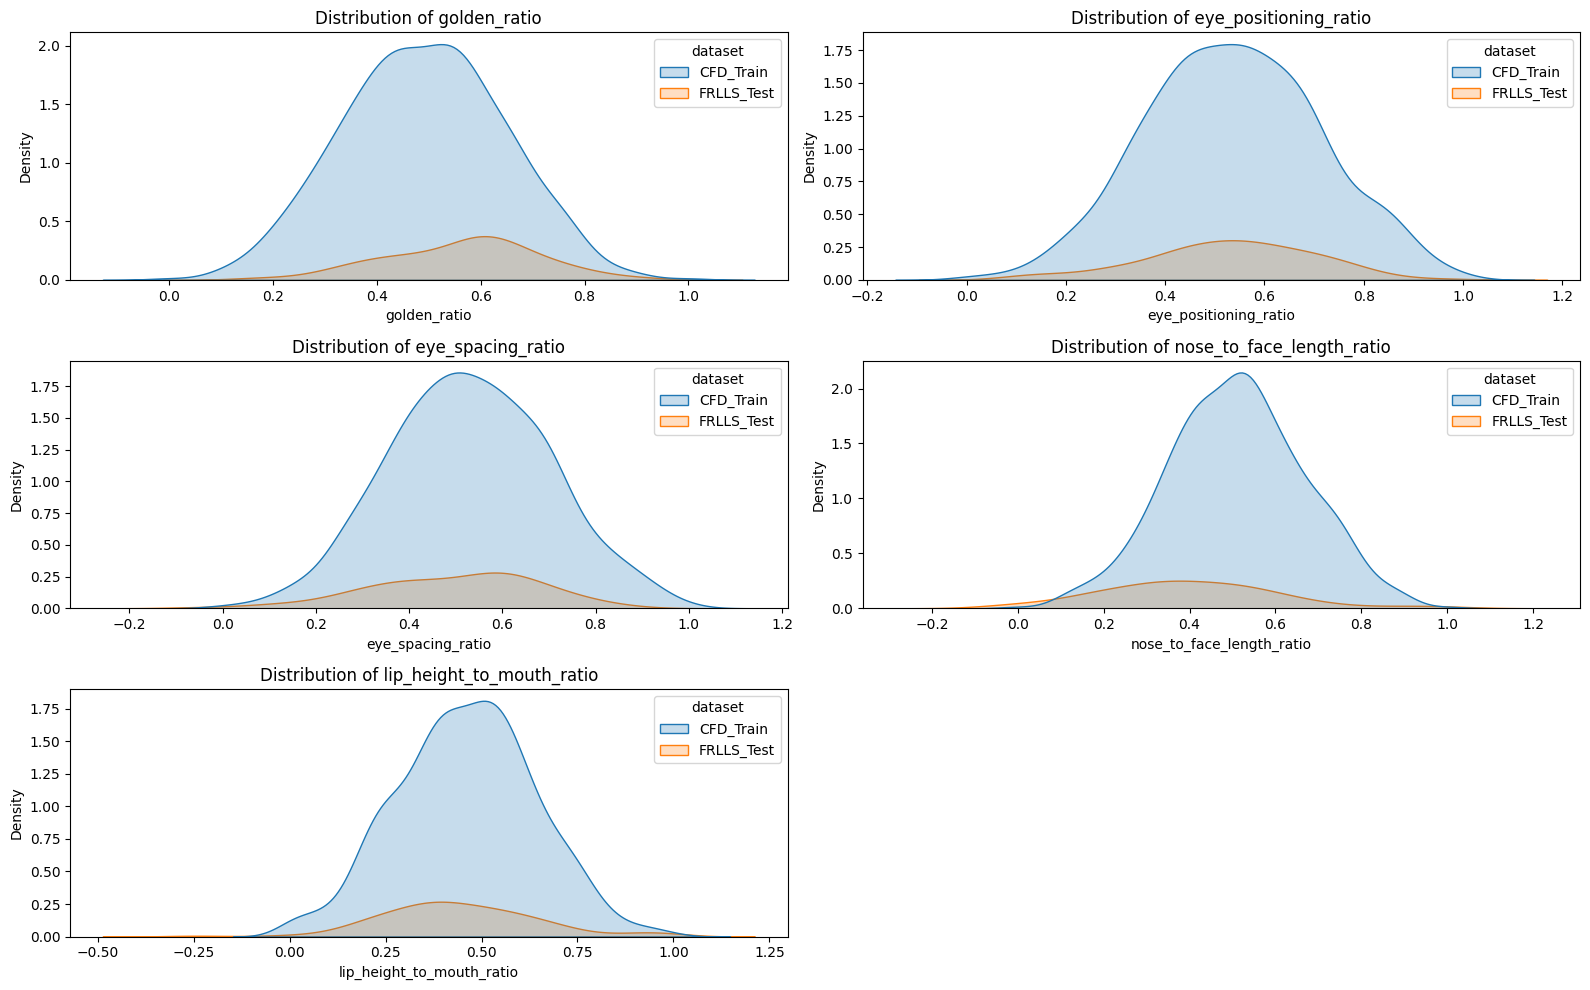

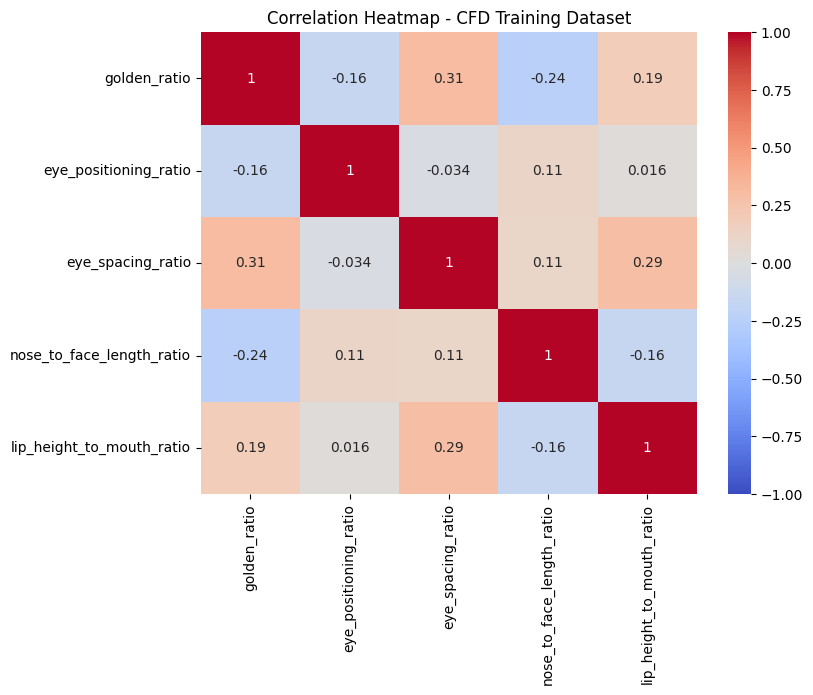

Variance Inflation Factor (VIF):
                      Feature        VIF
0               golden_ratio   9.560708
1      eye_positioning_ratio   8.251249
2          eye_spacing_ratio  12.826486
3  nose_to_face_length_ratio   8.759453
4  lip_height_to_mouth_ratio   7.810764
No pairs with correlation above 0.8 detected.

Descriptive Statistics for CFD Training Dataset (Selected Features):


golden_ratio  eye_positioning_ratio  eye_spacing_ratio  \
count      661.0000               661.0000           661.0000   
mean         0.4898                 0.5361             0.5290   
std          0.1561                 0.1760             0.1731   
min          0.0000                 0.0000             0.0000   
25%          0.3796                 0.4153             0.4070   
50%          0.4917                 0.5352             0.5266   
75%          0.5942                 0.6599             0.6559   
max          1.0000                 1.0000             1.0000   

       nose_to_face_length_ratio  lip_height_to_mouth_ratio  
count                   661.0000                   661.0000  
mean                      0.5085                     0.4595  
std                       0.1592                     0.1806  
min                       0.0000                     0.0000  
25%                       0.4053                     0.3382  
50%                       0.5092                     0.4653  
75%                       0.6130                     0.5791  
max                       1.0000                     1.0000


Descriptive Statistics for FRLLS Test Dataset (Selected Features):


golden_ratio  eye_positioning_ratio  eye_spacing_ratio  \
count      102.0000               102.0000           102.0000   
mean         0.5633                 0.5291             0.4934   
std          0.1473                 0.1698             0.1782   
min          0.1636                 0.1056            -0.0452   
25%          0.4650                 0.4251             0.3785   
50%          0.5880                 0.5391             0.5271   
75%          0.6626                 0.6473             0.6182   
max          0.9291                 0.9680             0.8580   

       nose_to_face_length_ratio  lip_height_to_mouth_ratio  
count                   102.0000                   102.0000  
mean                      0.3977                     0.4414  
std                       0.2051                     0.2044  
min                      -0.0415                    -0.2441  
25%                       0.2641                     0.3215  
50%                       0.3840                     0.4179  
75%                       0.5235                     0.5651  
max                       0.9892                     0.9691

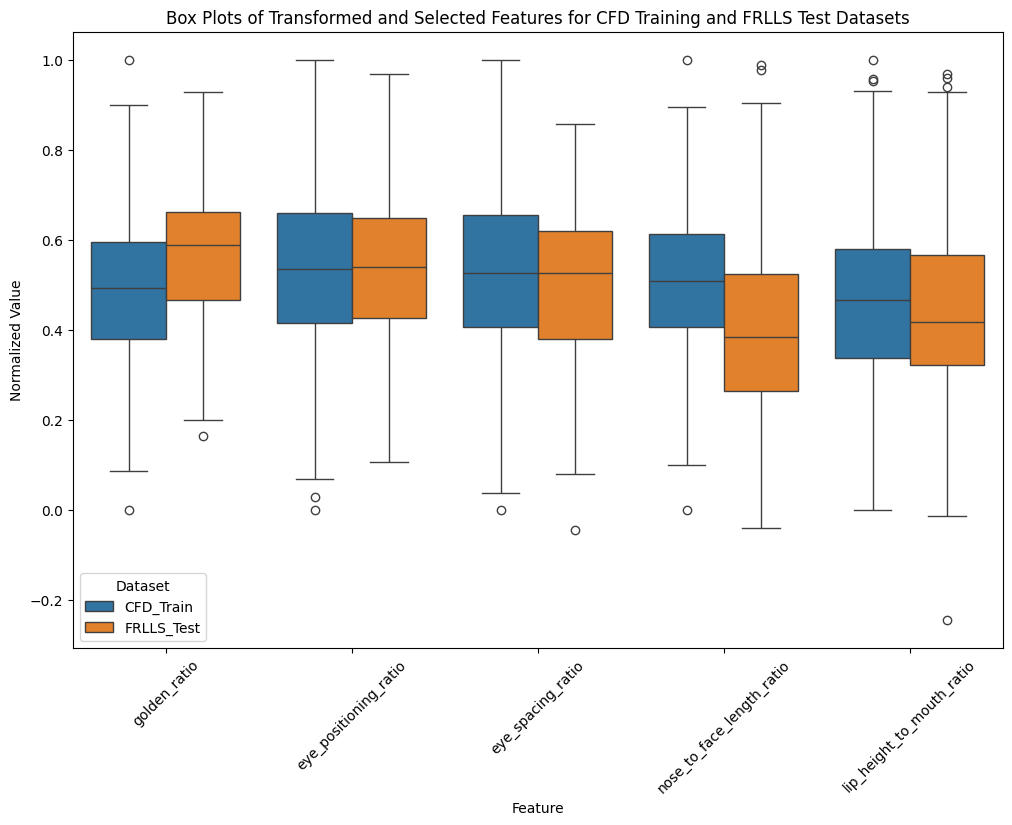

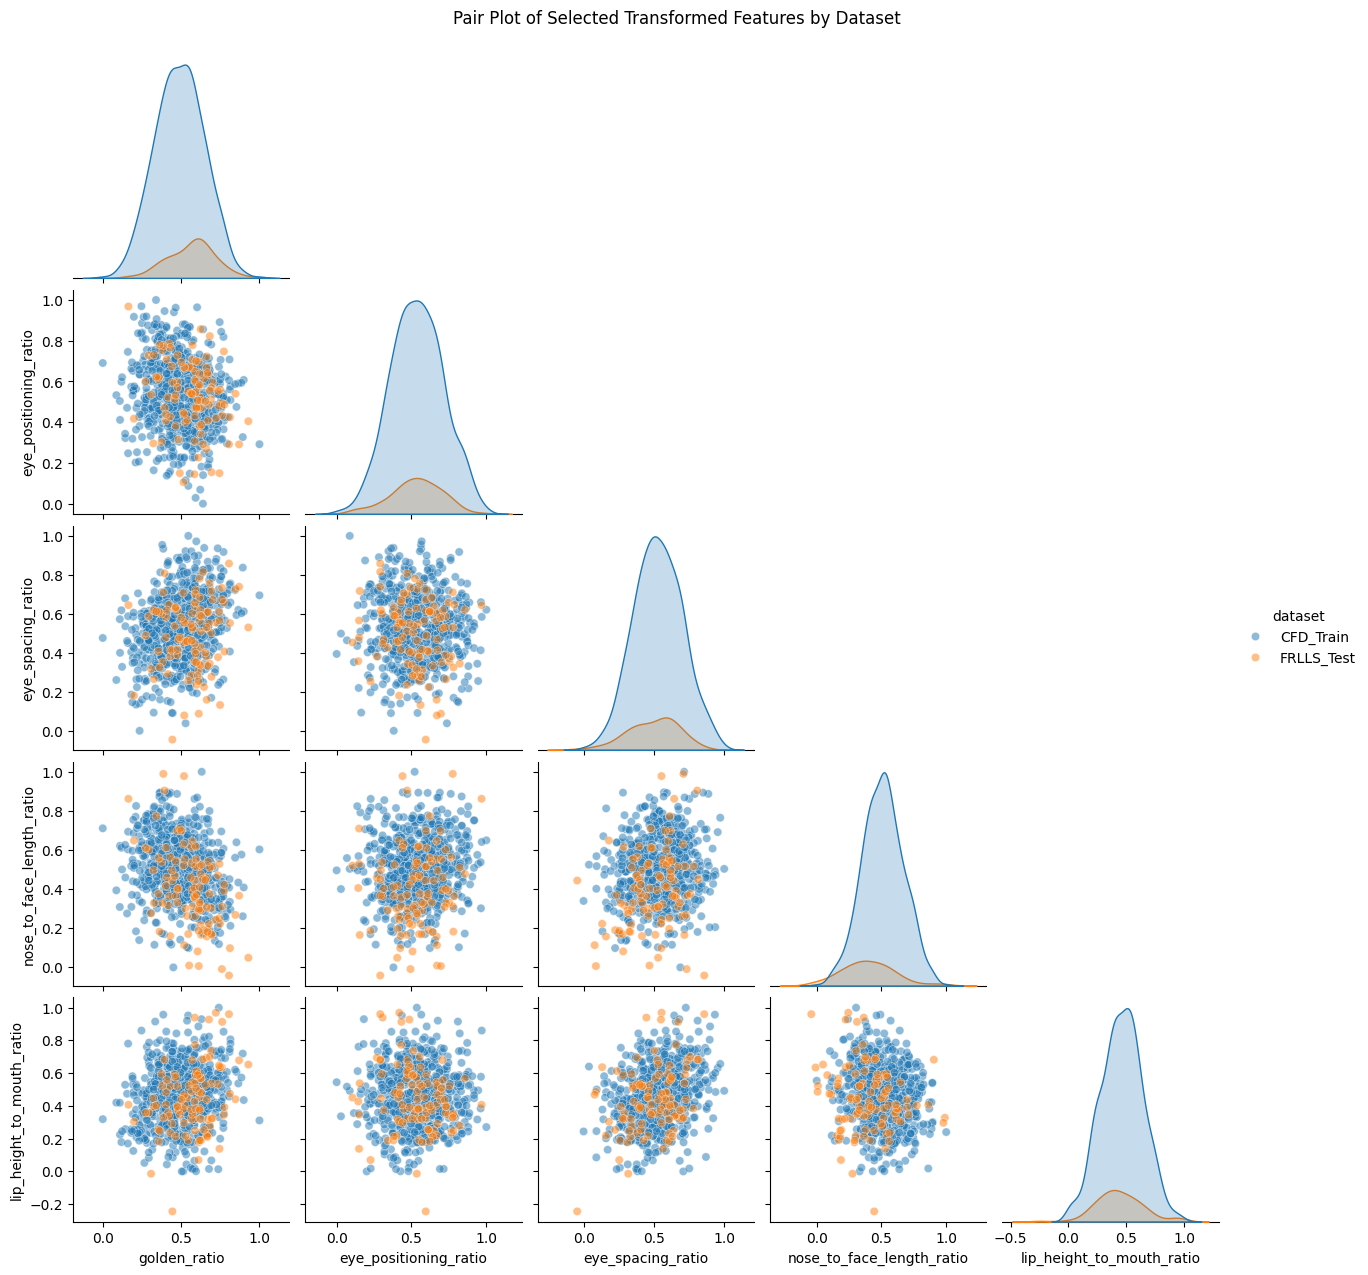

In [10]:
# EXPLORATORY DATA ANALYSIS OF SELECTED FEATURES
# Steps included are:
# 1. Visualizing feature distributions for each dataset to assess distribution differences.
# 2. Generating a correlation heatmap for the CFD training dataset to identify potential feature dependencies.
# 3. Calculating Variance Inflation Factor (VIF) to assess multi-collinearity among features in the CFD training dataset.
# 4. Displaying pairwise scatterplots for highly correlated feature pairs (if any).
# 5. Showing descriptive statistics (mean, std, etc.) for selected features in each dataset.
# 6. Visualizing feature distributions via box plots for a comparative view across datasets.
# 7. Creating pair plots to explore relationships among features, color-coded by dataset.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure the independently transformed datasets are used
# Use selected features identified during feature selection
X_train = transformed_train_df[selected_features]
X_frlls = transformed_frlls_df[selected_features]

# Step 1: Combine the datasets for EDA and add a 'dataset' identifier column
X_combined = pd.concat(
    [X_train.assign(dataset='CFD_Train'), X_frlls.assign(dataset='FRLLS_Test')],
    ignore_index=True
)

# 1. Feature Distributions for Each Dataset
plt.figure(figsize=(16, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(3, 2, i)
    sns.kdeplot(data=X_combined, x=feature, hue='dataset', fill=True)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

# 2. Pairwise Correlation Heatmap for the CFD Training Dataset
plt.figure(figsize=(8, 6))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap - CFD Training Dataset")
plt.show()

# 3. Multi-collinearity Check: Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("Variance Inflation Factor (VIF):\n", vif_data)

# 4. Pairwise Scatterplots for Highly Correlated Feature Pairs in CFD Training Set
high_corr_pairs = [
    (f1, f2) for f1 in X_train.columns for f2 in X_train.columns
    if f1 != f2 and abs(X_train.corr().loc[f1, f2]) > 0.8
]
if high_corr_pairs:
    print("\nHighly correlated feature pairs:\n", high_corr_pairs)
    plt.figure(figsize=(16, 12))
    for i, (f1, f2) in enumerate(high_corr_pairs[:10], 1):  # Display up to 10 pairs
        plt.subplot(5, 2, i)
        sns.scatterplot(data=X_combined, x=f1, y=f2, hue='dataset')
        plt.title(f"{f1} vs {f2}")
    plt.tight_layout()
    plt.show()
else:
    print("No pairs with correlation above 0.8 detected.")

# 5. Descriptive Statistics for Each Dataset
pd.options.display.float_format = '{:.4f}'.format  # Suppress scientific notation for readability

print("\nDescriptive Statistics for CFD Training Dataset (Selected Features):")
display(X_train.describe())

print("\nDescriptive Statistics for FRLLS Test Dataset (Selected Features):")
display(X_frlls.describe())

# Reset display options after displaying descriptive statistics
pd.reset_option('display.float_format')

# 6. Box Plots for Each Feature by Dataset
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_combined.melt(id_vars='dataset'), x='variable', y='value', hue='dataset')
plt.xticks(rotation=45)
plt.title("Box Plots of Transformed and Selected Features for CFD Training and FRLLS Test Datasets")
plt.ylabel("Normalized Value")
plt.xlabel("Feature")
plt.legend(title='Dataset')
plt.show()

# 7. Pair Plot for Each Feature (Colored by Dataset)
sns.pairplot(X_combined, hue='dataset', plot_kws={'alpha': 0.5}, corner=True)
plt.suptitle("Pair Plot of Selected Transformed Features by Dataset", y=1.02)
plt.show()


### Metrics Definitions

1. **Accuracy**:  
   The ratio of correctly predicted instances to the total number of instances.  
   Formula:  
   $$
   \text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Instances}}
   $$

2. **Precision**:  
   The proportion of positive predictions that are actually correct (how precise the positive predictions are).  
   Formula:  
   $$
   \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
   $$

3. **Recall (Sensitivity)**:  
   The proportion of actual positives that are correctly identified (also known as True Positive Rate).  
   Formula:  
   $$
   \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
   $$

4. **F1 Score**:  
   The harmonic mean of Precision and Recall, balancing both metrics. It ranges from 0 (worst) to 1 (best).  
   Formula:  
   $$
   \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
   $$


In [58]:
# This script evaluates the performance of multiple classifiers, including a Voting Classifier, 
# on a CFD validation set and an independent FRLLS test set. 
# Key steps:
# 1. **Dataset Preparation**: Extract features (X) and target variable (y) from transformed datasets.
#    - CFD dataset is split into training and validation subsets.
#    - FRLLS dataset is used as an independent test set.
# 2. **Classifier Definition**: Define individual classifiers and a Voting Classifier.
#    - The Voting Classifier combines the predictions of multiple models for ensemble performance.
# 3. **Training and Evaluation**:
#    - Each classifier is trained on the CFD training set and evaluated on:
#      - Validation set (for intermediate performance analysis).
#      - Test set (to assess generalization to unseen data).
# 4. **Performance Summary**:
#    - A consolidated summary table of validation and test metrics is displayed first.
# 5. **Detailed Results**:
#    - Individual classifier results (metrics and classification reports) are printed for detailed analysis.

import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Step 1: Filter the CFD and FRLLS datasets to include only the selected features
X_train = transformed_train_df[selected_features]
y_train = transformed_train_df['GenderBinary']

X_val = transformed_val_df[selected_features]
y_val = transformed_val_df['GenderBinary']

X_frlls = transformed_frlls_df[selected_features]
y_frlls = transformed_frlls_df['GenderBinary']

# Step 2: Define individual classifiers and the Voting Classifier
classifiers = {
    "Dummy (Random Guessing)": DummyClassifier(strategy="uniform", random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),  # probability=True for soft voting compatibility
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Voting Classifier combines the predictions of individual classifiers
voting_clf = VotingClassifier(estimators=[
    ('log_reg', LogisticRegression(random_state=42)),
    ('random_forest', RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)),
    ('svm', SVC(kernel='linear', probability=True, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('grad_boost', GradientBoostingClassifier(random_state=42)),
    ('naive_bayes', GaussianNB())
], voting='hard')

# Add the Voting Classifier to the list of classifiers for unified evaluation
classifiers["Voting Classifier"] = voting_clf

# Step 3: Initialize a list to store overall results for the summary
results = []

# Step 4: Train and evaluate each classifier, collecting metrics for the summary and detailed results
for name, clf in classifiers.items():
    # Train on CFD training set
    clf.fit(X_train, y_train)

    # Evaluate on CFD validation set
    y_val_pred = clf.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred, average='macro')
    val_recall = recall_score(y_val, y_val_pred, average='macro')
    val_f1 = f1_score(y_val, y_val_pred, average='macro')

    # Evaluate on FRLLS test set
    y_frlls_pred = clf.predict(X_frlls)
    test_accuracy = accuracy_score(y_frlls, y_frlls_pred)
    test_precision = precision_score(y_frlls, y_frlls_pred, average='macro')
    test_recall = recall_score(y_frlls, y_frlls_pred, average='macro')
    test_f1 = f1_score(y_frlls, y_frlls_pred, average='macro')

    # Append summary results
    results.append({
        'Classifier': name,
        'Validation Accuracy': val_accuracy,
        'Test Accuracy': test_accuracy
    })

# Step 5: Create and display the summary table before individual classifier results
summary_df = pd.DataFrame(results)
pd.set_option('display.float_format', '{:.2f}'.format)  # Format floats for better readability
print("\nClassifier Performance Summary (Validation and Test):")
display(summary_df)

# Step 6: Display detailed individual classifier results
for name, clf in classifiers.items():
    # Evaluate on CFD validation set
    y_val_pred = clf.predict(X_val)
    print(f"\n{name} - CFD Validation Results with Selected Features:")
    print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
    print(f"Precision: {precision_score(y_val, y_val_pred, average='macro'):.4f}")
    print(f"Recall: {recall_score(y_val, y_val_pred, average='macro'):.4f}")
    print(f"F1 Score: {f1_score(y_val, y_val_pred, average='macro'):.4f}")
    print(classification_report(y_val, y_val_pred))

    # Evaluate on FRLLS test set
    y_frlls_pred = clf.predict(X_frlls)
    print(f"\n{name} - FRLLS Test Results with Selected Features:")
    print(f"Accuracy: {accuracy_score(y_frlls, y_frlls_pred):.4f}")
    print(f"Precision: {precision_score(y_frlls, y_frlls_pred, average='macro'):.4f}")
    print(f"Recall: {recall_score(y_frlls, y_frlls_pred, average='macro'):.4f}")
    print(f"F1 Score: {f1_score(y_frlls, y_frlls_pred, average='macro'):.4f}")
    print(classification_report(y_frlls, y_frlls_pred))



Classifier Performance Summary (Validation and Test):


Classifier  Validation Accuracy  Test Accuracy
0  Dummy (Random Guessing)                 0.49           0.53
1      Logistic Regression                 0.73           0.74
2            Random Forest                 0.66           0.74
3                      SVM                 0.70           0.75
4      K-Nearest Neighbors                 0.70           0.75
5        Gradient Boosting                 0.66           0.73
6              Naive Bayes                 0.69           0.72
7        Voting Classifier                 0.70           0.74


Dummy (Random Guessing) - CFD Validation Results with Selected Features:
Accuracy: 0.4880
Precision: 0.4886
Recall: 0.4887
F1 Score: 0.4878
              precision    recall  f1-score   support

           0       0.50      0.46      0.48        85
           1       0.48      0.52      0.50        81

    accuracy                           0.49       166
   macro avg       0.49      0.49      0.49       166
weighted avg       0.49      0.49      0.49       166


Dummy (Random Guessing) - FRLLS Test Results with Selected Features:
Accuracy: 0.5294
Precision: 0.5275
Recall: 0.5271
F1 Score: 0.5265
              precision    recall  f1-score   support

           0       0.51      0.47      0.49        49
           1       0.54      0.58      0.56        53

    accuracy                           0.53       102
   macro avg       0.53      0.53      0.53       102
weighted avg       0.53      0.53      0.53       102


Logistic Regression - CFD Validation Results with Selected Features

In [ ]:
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

Voting Classifier - Validation Results:
Accuracy: 0.72
Precision: 0.72
Recall: 0.72
F1 Score: 0.71
              precision    recall  f1-score   support

           0       0.70      0.79      0.74        85
           1       0.74      0.64      0.69        81

    accuracy                           0.72       166
   macro avg       0.72      0.72      0.71       166
weighted avg       0.72      0.72      0.72       166

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step

Voting Classifier - Test Results:
Accuracy: 0.75
Precision: 0.78
Recall: 0.74
F1 Score: 0.73
              precision    recall  f1-score   support

           0       0.87      0.55      0.68        49
           1       0.69      0.92      0.79        53

    accuracy                           0.75       102
   macro avg       0.78      0.74      0.73       102
weighted avg       0.78      0.75      0.73       102


In [59]:
# This cell performs 5-fold cross-validation on the CFD training dataset for each classifier to evaluate model stability and generalization.
# Step 1: Use cross_val_score to compute the accuracy scores for each classifier over 5 folds.
# Step 2: For each classifier, print the individual cross-validation scores, mean accuracy, and standard deviation.
#         The mean accuracy provides an overall performance metric, while the standard deviation indicates consistency across folds.
# Results help identify which models perform best and most consistently, aiding in model selection for further testing on the FRLLS dataset.

from sklearn.model_selection import cross_val_score

# Cross-validation setup
cv_results = {}

# Perform 5-fold cross-validation on the CFD dataset for each classifier
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train_rfe, y_train, cv=5, scoring='accuracy')
    cv_results[name] = scores
    scores_rounded = [f"{score:.3f}" for score in scores]  # Round individual scores to 2 decimal places
    print(f"{name} - Cross-Validation Accuracy Scores: {', '.join(scores_rounded)}")
    print(f"{name} - Mean CV Accuracy: {scores.mean():.3f}, Std Dev: {scores.std():.3f}\n")

# Cross-validation setup
cv_summary = []

# Perform 5-fold cross-validation on the CFD dataset for each classifier
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train_rfe, y_train, cv=5, scoring='accuracy')
    cv_summary.append({
        "Classifier": name,
        "Mean Accuracy": round(scores.mean(), 3),
        "Std Dev": round(scores.std(), 3),
        "CV Scores": [round(score, 3) for score in scores]
    })

# Convert cross-validation results to DataFrame for display
cv_summary_df = pd.DataFrame(cv_summary)
cv_summary_df = cv_summary_df[["Classifier", "Mean Accuracy", "Std Dev"]]  # Reorder columns
print("\nSummary of Cross-Validation Results:")
display(cv_summary_df)

# Review and compare the mean and standard deviation of CV scores to evaluate consistency


Dummy (Random Guessing) - Cross-Validation Accuracy Scores: 0.474, 0.530, 0.470, 0.485, 0.470
Dummy (Random Guessing) - Mean CV Accuracy: 0.486, Std Dev: 0.023

Logistic Regression - Cross-Validation Accuracy Scores: 0.729, 0.659, 0.803, 0.750, 0.780
Logistic Regression - Mean CV Accuracy: 0.744, Std Dev: 0.050

Random Forest - Cross-Validation Accuracy Scores: 0.684, 0.667, 0.803, 0.758, 0.788
Random Forest - Mean CV Accuracy: 0.740, Std Dev: 0.055

SVM - Cross-Validation Accuracy Scores: 0.707, 0.674, 0.811, 0.765, 0.780
SVM - Mean CV Accuracy: 0.747, Std Dev: 0.050

K-Nearest Neighbors - Cross-Validation Accuracy Scores: 0.639, 0.667, 0.750, 0.727, 0.705
K-Nearest Neighbors - Mean CV Accuracy: 0.698, Std Dev: 0.040

Gradient Boosting - Cross-Validation Accuracy Scores: 0.692, 0.652, 0.795, 0.750, 0.742
Gradient Boosting - Mean CV Accuracy: 0.726, Std Dev: 0.050

Naive Bayes - Cross-Validation Accuracy Scores: 0.722, 0.674, 0.811, 0.765, 0.727
Naive Bayes - Mean CV Accuracy: 0.740, S

Classifier  Mean Accuracy  Std Dev
0  Dummy (Random Guessing)           0.49     0.02
1      Logistic Regression           0.74     0.05
2            Random Forest           0.74     0.06
3                      SVM           0.75     0.05
4      K-Nearest Neighbors           0.70     0.04
5        Gradient Boosting           0.73     0.05
6              Naive Bayes           0.74     0.05
7        Voting Classifier           0.75     0.04

In [60]:
# This cell implements a neural network model to classify images based on selected feature ratios.
# The model architecture, training setup, and evaluation are designed to provide a flexible approach 
# to understanding the predictive power of neural networks on CFD and FRLLS datasets. 
# Key steps in this process are as follows:

# Step 1: Prepare and preprocess data
#   - Filter the CFD and FRLLS datasets to retain only the selected features based on prior feature selection.
#   - Split the CFD dataset into training and validation sets to allow for model training and performance tuning.

# Step 2: Define the neural network architecture
#   - The model consists of an input layer, followed by hidden layers with ReLU activations, batch normalization, 
#     and dropout layers for regularization. These choices help the model generalize better and reduce overfitting.
#   - The output layer has a single neuron with a sigmoid activation for binary classification.

# Step 3: Configure training with early stopping
#   - Early stopping is applied to monitor validation loss and prevent overfitting by stopping training if the 
#     model’s performance stops improving on the validation set.
#   - The Adam optimizer is used with a specified learning rate for efficient training.

# Step 4: Train the model
#   - The model is trained using binary cross-entropy loss, suitable for binary classification.
#   - During training, validation metrics are monitored to gauge the model’s performance on unseen data.

# Step 5: Evaluate model performance on the CFD validation set
#   - Predictions are made on the validation set, and key metrics (accuracy, precision, recall, and F1-score) 
#     are calculated to assess the model’s effectiveness.
#   - A classification report is printed to provide a detailed breakdown of the model’s performance by class.

# Step 6: Test the model on the FRLLS dataset
#   - To evaluate generalizability, the model is tested on the FRLLS dataset, a separate set of samples.
#   - The same performance metrics are calculated and printed for comparison with the CFD validation results.

# Summary: This approach allows for a thorough comparison of model performance between two datasets, 
# helping assess how well the neural network generalizes. Future improvements could include experimenting 
# with hyperparameters, adjusting the model architecture, or incorporating additional regularization techniques.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import random

# Set random seed for reproducibility
SEED = 42
np.random.seed(SEED)  # NumPy random seed
random.seed(SEED)  # Python random seed
tf.random.set_seed(SEED)  # TensorFlow random seed

# Step 1: Use independently transformed and scaled datasets
X_train = transformed_train_df[selected_features]  # CFD training set
y_train = transformed_train_df['GenderBinary']

X_val = transformed_val_df[selected_features]  # CFD validation set
y_val = transformed_val_df['GenderBinary']

X_frlls = transformed_frlls_df[selected_features]  # FRLLS test set
y_frlls = transformed_frlls_df['GenderBinary']

# Step 2: Compute class weights for handling class imbalance
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

# Step 3: Define the neural network model
def create_model(input_shape):
    model = Sequential([
        Input(shape=(input_shape,)),  # Input layer
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Initialize the model
input_shape = X_train.shape[1]
model = create_model(input_shape)

# Step 4: Set up early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Step 5: Train the model on the CFD dataset
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=16,
    callbacks=[early_stopping],
    class_weight=class_weights,  # Apply class weights
    verbose=1
)

# Step 6: Evaluate the model on the CFD validation set
y_val_pred_proba = model.predict(X_val)
y_val_pred = (y_val_pred_proba > 0.5).astype(int)

print("\nNeural Network - CFD Validation Results:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.2f}")
print(f"Precision: {precision_score(y_val, y_val_pred, average='macro', zero_division=0):.2f}")
print(f"Recall: {recall_score(y_val, y_val_pred, average='macro'):.2f}")
print(f"F1 Score: {f1_score(y_val, y_val_pred, average='macro'):.2f}")
print(classification_report(y_val, y_val_pred, zero_division=0))

# Step 7: Evaluate the model on the FRLLS test set
y_frlls_pred_proba = model.predict(X_frlls)
y_frlls_pred = (y_frlls_pred_proba > 0.5).astype(int)

print("\nNeural Network - FRLLS Test Results:")
print(f"Accuracy: {accuracy_score(y_frlls, y_frlls_pred):.2f}")
print(f"Precision: {precision_score(y_frlls, y_frlls_pred, average='macro', zero_division=0):.2f}")
print(f"Recall: {recall_score(y_frlls, y_frlls_pred, average='macro'):.2f}")
print(f"F1 Score: {f1_score(y_frlls, y_frlls_pred, average='macro'):.2f}")
print(classification_report(y_frlls, y_frlls_pred, zero_division=0))


Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6058 - loss: 0.7874 - val_accuracy: 0.5120 - val_loss: 0.6856
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6863 - loss: 0.6317 - val_accuracy: 0.5120 - val_loss: 0.6839
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6910 - loss: 0.6260 - val_accuracy: 0.5120 - val_loss: 0.6840
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.7071 - loss: 0.5965 - val_accuracy: 0.5723 - val_loss: 0.6562
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.6826 - loss: 0.6214 - val_accuracy: 0.6325 - val_loss: 0.6432
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.7116 - loss: 0.5686 - val_accuracy: 0.6145 - val_loss: 0.6394
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.7235 - loss: 0.5473 - val_accuracy: 0.6325 - val_loss: 0.6337
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.7576 - loss: 0.5187 - val_accuracy: 

In [61]:
# This script implements a neural network for binary classification using cross-validation.
# It evaluates model performance using metrics such as accuracy, precision, recall, and F1-score.

import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

# Set random seed for reproducibility
SEED = 42
np.random.seed(SEED)  # Set seed for NumPy
tf.random.set_seed(SEED)  # Set seed for TensorFlow

# Initialize result collection
nn_results = []

# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=SEED)  # Use the same seed for scikit-learn

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    # Split the data into training and validation subsets
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Output the size of each fold
    print(f"Fold {fold + 1}:")
    print(f"  Training set size: {len(X_train)} samples")
    print(f"  Validation set size: {len(X_val)} samples\n")

    # Initialize and train the neural network model
    model = create_model(input_shape=X_train.shape[1])
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=16,
        callbacks=[early_stopping],
        verbose=0  # Suppress training logs
    )

    # Predict on the validation set
    y_val_pred_proba = model.predict(X_val)
    y_val_pred = (y_val_pred_proba > 0.5).astype(int)  # Threshold predictions at 0.5

    # Store performance metrics for each fold
    nn_results.append({
        "Fold": fold + 1,
        "Training Size": len(X_train),
        "Validation Size": len(X_val),
        "Accuracy": round(accuracy_score(y_val, y_val_pred), 3),
        "Precision": round(precision_score(y_val, y_val_pred, average='macro'), 3),
        "Recall": round(recall_score(y_val, y_val_pred, average='macro'), 3),
        "F1 Score": round(f1_score(y_val, y_val_pred, average='macro'), 3)
    })

# Convert neural network results to DataFrame
nn_summary_df = pd.DataFrame(nn_results)
print("\nSummary of Neural Network Cross-Validation Results:")
display(nn_summary_df)


Fold 1:
  Training set size: 528 samples
  Validation set size: 133 samples

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Fold 2:
  Training set size: 529 samples
  Validation set size: 132 samples

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  
Fold 3:
  Training set size: 529 samples
  Validation set size: 132 samples

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Fold 4:
  Training set size: 529 samples
  Validation set size: 132 samples

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  
Fold 5:
  Training set size: 529 samples
  Validation set size: 132 samples

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

Summary of Neural Network Cross-Validation Results:


Fold  Training Size  Validation Size  Accuracy  Precision  Recall  F1 Score
0     1            528              133      0.76       0.76    0.76      0.76
1     2            529              132      0.74       0.74    0.74      0.74
2     3            529              132      0.71       0.71    0.71      0.71
3     4            529              132      0.76       0.76    0.76      0.76
4     5            529              132      0.70       0.70    0.70      0.70